# <center> Máster Universitario en Ingeniería y Ciencia de Datos 2022-2023 </center> 

<center>Autor: Alfredo Madrid García<center>

<center>Email: amadrid72@alumnos.uned.es<center>

# Notas

1. El procesado que se hace inicialmente para los tres conjuntos podría obviarse para el de test, puesto que luego, al hacer la evaluación, lo manipulamos de distinta forma



# Configuración Experimentos

In [ ]:
# Para una experimentación más segura y rápida, definimos los parámetros de la tabla anterior
# "ner" equivale a 1, "class" a 2
tarea_param = "class" # Opciones "ner"/"class".
# Análisis considerando el nivel de agregación a sentencia o a nota completa
analisis_param = "sentencia" # Opciones "completo"/"sentencia".
# Uso de BETO cased o uncased
modelo_usado = "dccuchile/albert-base-spanish"
# Si añadimos el conjunto de MOD
conjuntodatos = "" # Opciones "MOD"/""

# Controlamos la proporción de la división de entrenamiento y test
train_size_param = 0.8

# Calculamos la longitud de la sentencia/nota clínica. Para nota clínica dejar en 510. Para sentencia un valor alrededor de 50
longitud_maxima_param = 510 #MAX_LEN
batch_size_param = 4 #bs
epochs_param = 10 #epochs
max_grad_norm_param = 1.0 #max_grad_norm
learning_rate_param = 2e-5 #lr
eps_param = 1e-8 #eps

# Fecha
from datetime import date
today = date.today()

# Especificamos la carpeta donde se guardan los modelos
ruta = "MEDDO_" + conjuntodatos + "_" + "ALBETO_" + tarea_param + "_" + analisis_param  + "_" + str(longitud_maxima_param) + "_" + str(batch_size_param) + "_" + str(epochs_param) + "_" + str(learning_rate_param) + "_" + str(eps_param)

In [ ]:
ruta

'MEDDO__ALBETO_class_sentencia_510_4_10_2e-05_1e-08'

Confirmación experimento

In [ ]:
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from rich.console import Console
from rich.table import Table

console = Console()

table = Table(show_header=True, header_style="bold magenta")
table.add_column("Fecha", style="dim", width=12)
table.add_column("Nivel agregación")
table.add_column("Modelo", justify="right")
table.add_column("Datos", justify="right")
table.add_column("Learning rate", justify="right")
table.add_column("Batch size", justify="right")
table.add_column("Eps", justify="right")
table.add_column("Epochs", justify="right")
table.add_column("Max length", justify="right")
table.add_column("Max grad norm", justify="right")
table.add_column("Optimizer", justify="right")
table.add_row(
    str(today), analisis_param, modelo_usado, conjuntodatos, str(learning_rate_param), str(batch_size_param), str(eps_param), str(epochs_param), str(longitud_maxima_param), str(max_grad_norm_param), "AdamW"
)
console.print(table)

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃              ┃          ┃         ┃       ┃          ┃         ┃       ┃        ┃          ┃     Max ┃          ┃
┃              ┃ Nivel    ┃         ┃       ┃ Learning ┃   Batch ┃       ┃        ┃      Max ┃    grad ┃          ┃
┃ Fecha        ┃ agregac… ┃  Modelo ┃ Datos ┃     rate ┃    size ┃   Eps ┃ Epochs ┃   length ┃    norm ┃ Optimiz… ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ 2023-04-21   │ sentenc… │ dccuch… │       │    2e-05 │       4 │ 1e-08 │     10 │      510 │     1.0 │    AdamW │
└──────────────┴──────────┴─────────┴───────┴──────────┴─────────┴───────┴────────┴──────────┴─────────┴──────────┘

# Montamos Google Drive

In [ ]:
# Enlazamos nuestro notebook en Colab con nuestro almacenamiento en Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Comprobación entorno de alto rendimiento

Comprobamos el hardware asignado por Google Colab para el desarrollo de la práctica después de fijar un entorno de alto rendimiento.

In [ ]:
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Comprobamos las GPU disponibles (no necesario el uso de GPU para este ejercicio)
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Fri Apr 21 21:27:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Vemos si estamos en un entorno con alta capacidad de memoria RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Librerias
Cargamos las librerías necesarias

In [ ]:
# Para ver el tiempo de ejecución de cada celda
!pip install ipython-autotime
%load_ext autotime

# Procesado de datos
import pandas as pd
import numpy as np
import operator

# Habilitamos display interactivo y enlace con nuestra cuenta de google
from google.colab import data_table
from google.colab import drive

# Tokenizador
import nltk
from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer

# Expresiones regulares
import re

# Fijar semilla
import random
random.seed(42)

# Librerias cargadas por el equipo de MUCIC
!pip install pycorenlp
!pip install pyneuroner[gpu]
!pip install transformers seqeval[gpu]
#!pip install -q flair
!pip install seqeval
import seqeval
# Deprecated
#!python -m spacy download es
#!python -m spacy download en

# Transformers
!pip install transformers seqeval[gpu]
from transformers import BertTokenizer, BertConfig, BertForTokenClassification

# Notificar el estado de los modelos al entrenar
# https://github.com/huggingface/knockknock#telegram
!pip install knockknock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycorenlp: filename=pycorenlp-0.3.0-py3-none-any.whl size=2142 sha256=d2ba05c189c128a1a3c20f96001763b562ad34c5c4db1c5add6fe4ba54166cbc
  Stored in directory: /root/.cache/pip/wheels/99/43/83/53a89b5afcfe4bdaeec4ef0ff54ab0e09d6d3683d2884d1b4d
Successfully built pycorenlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 62.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not 

Código inspirado en:
1. https://www.depends-on-the-definition.com/named-entity-recognition-with-bert/
2. https://github.com/fazlfrs/MUCIC-MEDDOPROF (https://github.com/fazlfrs/MUCIC-MEDDOPROF/blob/main/MUCIC_MEDDOPROF/meddoprof-final-bert.ipynb)

# Preparación del conjunto de datos

Cargamos el conjunto de entrenamiento y el de test. Según la documentación de spaCy se recomienda coger sm.

En función de cómo hayamos configurado la variable "tarea" al inicio del script hará una tarea (identificación de profesiones) u otra (a quien pertenecen las profesiones)

In [ ]:
if (tarea_param == "ner"):
  # Tarea 1
  ruta_train = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Procesado/NeuroNER/Train/task1neuronersm_final.txt"
  ruta_train_mod = "/content/drive/MyDrive/Colab Notebooks/Corpus/MOD/Procesado/task1MODneuronersm_final.txt"
  ruta_test = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Procesado/NeuroNER/Test/nerneuronersm_final.txt"
if (tarea_param == "class"):
  # Tarea 2
  ruta_train = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Procesado/NeuroNER/Train/task2neuronersm_final.txt"
  ruta_train_mod = "/content/drive/MyDrive/Colab Notebooks/Corpus/MOD/Procesado/task2MODneuronersm_final.txt"
  ruta_test = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Procesado/NeuroNER/Test/classneuronersm_final.txt"

print("Tarea: ", tarea_param)

Tarea:  class
time: 2.12 ms (started: 2023-04-21 21:28:08 +00:00)


Carga del conjunto **TRAIN**

In [ ]:
# Cargamos el archivo de train
# Si no ponemos on_bad_lines = "skip" obtenemos diferente valor en 876191	en	casos_clinicos_profesiones91	536	538	B-PROFESION
# Si no ponemos quoting = 3 obtenemos varios errores, por ejemplo, S0210-48062003000100010-1 917 918 O\nsecond S...	
train = pd.read_csv(ruta_train, sep=' ', quoting=3, on_bad_lines='skip')

# Si usamos el conjunto ampliado (MOD) lo anexionamos aquí
if (conjuntodatos == "MOD"):
  train_mod = pd.read_csv(ruta_train_mod, sep=' ', quoting=3, on_bad_lines='skip')
  train = pd.concat([train, train_mod])

# Transformamos las variables words, fileId y label, en el tipo adecuado 
train['words'] = train['words'].astype('str')
train['fileId'] = train['fileId'].astype('str')
train['label'] = train['label'].astype('category')

train.dtypes

words           object
fileId          object
start            int64
end              int64
label         category
sentenceID       int64
dtype: object

time: 4.06 s (started: 2023-04-21 21:28:08 +00:00)


Por cada token obtenemos tenemos 5 columnas que nos indican qué token es, de qué archivo, la posición que ocupa el token y en la posición en la que termina y que etiqueta tiene

In [ ]:
# Vemos el aspecto del archivo
print(train.head())
print(len(train))

       words       fileId  start  end label  sentenceID
0         Un  32247016_ES      0    2     O           1
1   paciente  32247016_ES      3   11     O           1
2         de  32247016_ES     12   14     O           1
3       unos  32247016_ES     15   19     O           1
4  cincuenta  32247016_ES     20   29     O           1
1076484
time: 6.75 ms (started: 2023-04-21 21:28:12 +00:00)


In [ ]:
# Vemos la distribución de las etiquetas
train.label.value_counts()

O              1067316
I-PACIENTE        3633
B-PACIENTE        1735
I-SANITARIO       1290
B-SANITARIO       1228
B-OTROS            484
I-OTROS            313
I-FAMILIAR         278
B-FAMILIAR         207
Name: label, dtype: int64

time: 9.61 ms (started: 2023-04-21 21:28:13 +00:00)


Carga del conjunto **TEST**

In [ ]:
# Cargamos el archivo de Test de la Tarea 1
test = pd.read_csv(ruta_test, sep=' ', quoting=3, on_bad_lines='skip')

# Transformamos las variables label y words
test['fileId'] = test['fileId'].astype('str')
test['words'] = test['words'].astype('str')
test['label'] = test['label'].astype('category')

test.dtypes

words           object
fileId          object
start            int64
end              int64
label         category
sentenceID       int64
dtype: object

time: 882 ms (started: 2023-04-21 21:28:13 +00:00)


In [ ]:
# Vemos el aspecto del archivo
print(test.head())
print(len(test))

    words       fileId  start  end label  sentenceID
0      Un  32423911_ES      0    3     O           1
1  hombre  32423911_ES      4   10     O           1
2      de  32423911_ES     11   13     O           1
3      36  32423911_ES     14   16     O           1
4    años  32423911_ES     17   21     O           1
215531
time: 5.25 ms (started: 2023-04-21 21:28:13 +00:00)


In [ ]:
# Vemos la distribución de las etiquetas
test.label.value_counts()

O              212753
I-PACIENTE       1231
B-PACIENTE        590
I-SANITARIO       299
B-SANITARIO       293
B-OTROS           146
I-FAMILIAR         87
I-OTROS            80
B-FAMILIAR         52
Name: label, dtype: int64

time: 5.87 ms (started: 2023-04-21 21:28:13 +00:00)


Calculamos el número de tokens por fileId y por sentenceID. Además comprobamos que si sumamos el número de tokens de sentenceID de un mismo fileId tenemos el mismo número de tokens que en fileId

In [ ]:
prueba_test = test[["words", "fileId", "sentenceID"]]
prueba_test

,words,fileId,sentenceID
0,Un,32423911_ES,1
1,hombre,32423911_ES,1
2,de,32423911_ES,1
3,36,32423911_ES,1
4,años,32423911_ES,1
...,...,...,...
215526,diagnóstico,cc_reuma8,10439
215527,de,cc_reuma8,10439
215528,artritis,cc_reuma8,10439
215529,reumatoide,cc_reuma8,10439


time: 17.7 ms (started: 2023-04-21 21:28:13 +00:00)


In [ ]:
# Comprobamos la separación por sentencia
prueba_test['size_fileId'] = prueba_test.groupby('fileId')['fileId'].transform('size')
prueba_test['size_sentenceId'] = prueba_test.groupby(['fileId', 'sentenceID'])['fileId'].transform('size')
prueba_test = prueba_test[["fileId", "sentenceID", "size_fileId", "size_sentenceId"]].drop_duplicates()
prueba_test['group_sum'] = prueba_test.groupby('fileId')['size_sentenceId'].transform('sum')
prueba_test['size_fileId'].equals(prueba_test['group_sum'])
prueba_test

<ipython-input-16-8fbede585e85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba_test['size_fileId'] = prueba_test.groupby('fileId')['fileId'].transform('size')
<ipython-input-16-8fbede585e85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba_test['size_sentenceId'] = prueba_test.groupby(['fileId', 'sentenceID'])['fileId'].transform('size')


,fileId,sentenceID,size_fileId,size_sentenceId,group_sum
0,32423911_ES,1,629,30,629
30,32423911_ES,2,629,18,629
48,32423911_ES,3,629,17,629
65,32423911_ES,4,629,11,629
76,32423911_ES,5,629,15,629
...,...,...,...,...,...
215452,cc_reuma8,10435,148,12,148
215464,cc_reuma8,10436,148,17,148
215481,cc_reuma8,10437,148,17,148
215498,cc_reuma8,10438,148,22,148


time: 86.4 ms (started: 2023-04-21 21:28:13 +00:00)


Configuramos el nivel de agregación del análisis

In [ ]:
print("Tipo de análisis elegido: ", analisis_param)

# Análisis introduciendo toda la nota clínica y truncando
if (analisis_param == "completo"):
  # Creamos dos columnas con la información de la frase y de las etiquetas
  train['sentence'] = train.groupby(['fileId'])['words'].transform(lambda x: ' '.join(x))
  train['word_labels'] = train.groupby(['fileId'])['label'].transform(lambda x: ' '.join(x))

  # Las predicciones se hace a nivel de sentencia aunque se entrene con la nota completa
  test['sentence'] = test.groupby(['sentenceID'])['words'].transform(lambda x: ' '.join(x))
  test['word_labels'] = test.groupby(['sentenceID'])['label'].transform(lambda x: ' '.join(x))
  test['inicio'] = test['start'].astype(str)
  test['fin'] = test['end'].astype(str)
  test['inicio'] = test.groupby(['sentenceID'])['inicio'].transform(lambda x: ' '.join(x))
  test['fin'] = test.groupby(['sentenceID'])['fin'].transform(lambda x: ' '.join(x))
  
  # Nos quedamos únicamente con las columnas sentence y el word_labels
  datos_procesados_train = train[["fileId", "sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)
  datos_procesados_test = test[["fileId", "sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)

  # Número de filas distintas
  print("Número de filas distintas train: ", train['fileId'].nunique())
  print("Número de filas distintas test: ", test['fileId'].nunique())
  print("Número de filas distintas datos_procesado_train: ", datos_procesados_train['fileId'].nunique())
  print("Número de filas distintas datos_procesado_test: ", datos_procesados_test['fileId'].nunique())
  
# Análisis introduciendo las sentencias de la nota clínica
if (analisis_param == "sentencia"):
  # Creamos dos columnas con la información de la frase y de las etiquetas
  train['sentence'] = train.groupby(['sentenceID'])['words'].transform(lambda x: ' '.join(x))
  train['word_labels'] = train.groupby(['sentenceID'])['label'].transform(lambda x: ' '.join(x))

  test['sentence'] = test.groupby(['sentenceID'])['words'].transform(lambda x: ' '.join(x))
  test['word_labels'] = test.groupby(['sentenceID'])['label'].transform(lambda x: ' '.join(x))
  test['inicio'] = test['start'].astype(str)
  test['fin'] = test['end'].astype(str)
  test['inicio'] = test.groupby(['sentenceID'])['inicio'].transform(lambda x: ' '.join(x))
  test['fin'] = test.groupby(['sentenceID'])['fin'].transform(lambda x: ' '.join(x))

  # Nos quedamos únicamente con las columnas sentence y el word_labels
  datos_procesados_train = train[["sentenceID", "sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)
  datos_procesados_test = test[["sentenceID", "sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)

  # Número de filas distintas
  print("Número de filas distintas train: ", train['sentenceID'].nunique())
  print("Número de filas distintas test: ", test['sentenceID'].nunique())
  print("Número de filas distintas datos_procesado_train: ", datos_procesados_train['sentenceID'].nunique())
  print("Número de filas distintas datos_procesado_test: ", datos_procesados_test['sentenceID'].nunique())

Tipo de análisis elegido:  sentencia
Número de filas distintas train:  50442
Número de filas distintas test:  9796
Número de filas distintas datos_procesado_train:  50442
Número de filas distintas datos_procesado_test:  9796
time: 31.1 s (started: 2023-04-21 21:28:14 +00:00)


En cada columna, además, va a aparecer la frase entera y las etiquetas de dicha frase

In [ ]:
# Vemos el aspecto del df de train
train.head()

,words,fileId,start,end,label,sentenceID,sentence,word_labels
0,Un,32247016_ES,0,2,O,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...
1,paciente,32247016_ES,3,11,O,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...
2,de,32247016_ES,12,14,O,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...
3,unos,32247016_ES,15,19,O,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...
4,cincuenta,32247016_ES,20,29,O,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...


time: 29.4 ms (started: 2023-04-21 21:28:45 +00:00)


In [ ]:
# Vemos el aspecto del df de test
test.head()

,words,fileId,start,end,label,sentenceID,sentence,word_labels,inicio,fin
0,Un,32423911_ES,0,3,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
1,hombre,32423911_ES,4,10,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
2,de,32423911_ES,11,13,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
3,36,32423911_ES,14,16,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
4,años,32423911_ES,17,21,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...


time: 16.3 ms (started: 2023-04-21 21:28:45 +00:00)


Nos quedamos únicamente con el fichero, la nota completa y la etiqueta completa de la nota

In [ ]:
# Vemos el aspecto del df de train procesado
datos_procesados_train

,sentenceID,sentence,word_labels
0,1,Un paciente de unos cincuenta años sin anteced...,O O O O O O O O O O O O B-SANITARIO I-SANITARI...
1,2,Su empresa ( empresa X ) lo había destinado a ...,O O O O O O O O O O O O O O O O O O O O O O O ...
2,3,A causa de la persistencia de la fiebre y la t...,O O O O O O O O O O O O O O O O O O O O O O O ...
3,4,"A la exploración , presentó fiebre ( 40 °C ) y...",O O O O O O O O O O O O O O O O O O O O O O O
4,5,La auscultación pulmonar reveló crepitantes ba...,O O O O O O O O
...,...,...,...
50437,53120,En la ecografía se observa adenopatías derecha...,O O O O O O O O O O O O O O O O O O O O O O O O O
50438,53121,Se realiza exéresis en la que se observa un ga...,O O O O O O O O O O O O O O O O O O O O O O O O O
50439,53122,"Posteriormente , se decide vaciamiento cervical .",O O O O O O O
50440,53123,Se deriva a dermatología quien observó un mela...,O O O O O O O O O O O O O O O O O O


time: 15.7 ms (started: 2023-04-21 21:28:45 +00:00)


## División en entrenamiento y validación

Vemos las dimensiones de todos los conjuntos

In [ ]:
# Separamos el conjunto de datos en entrenamiento y validación
# Conjunto de entrenamiento
train_size = train_size_param
train_dataset = datos_procesados_train.sample(frac=train_size, random_state=42)

# Al conjunto de validación le quitamos los índices que están en el conjunto de entrenamiento
validation_dataset = datos_procesados_train.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

# Comprobamos el tamaño de los distintos conjuntos de datos
print("FULL TRAIN + VALIDATION Dataset: {}".format(datos_procesados_train.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("VALIDATION Dataset: {}".format(validation_dataset.shape))

print("TEST Dataset: {}".format(datos_procesados_test.shape))

FULL TRAIN + VALIDATION Dataset: (50442, 3)
TRAIN Dataset: (40354, 3)
VALIDATION Dataset: (10088, 3)
TEST Dataset: (9796, 3)
time: 24.4 ms (started: 2023-04-21 21:28:45 +00:00)


Vemos el contenido de `train_dataset` después de coger un subconjunto de los datos

In [ ]:
train_dataset.head(5)

,sentenceID,sentence,word_labels
0,25401,"Su madre padece """""""" depresiones """""""" , no ref...",O O O O O O O O O O O O O O O O O
1,3181,Motivo de Consulta Mujer de 57 años con antece...,O O O O O O O O O O O O O O O O O O O O O O O ...
2,42594,-Dolorosa : conservada normal en los segmentos...,O O O O O O O O O
3,9692,SOSPECHA DE TOXOPLASMOSIS CEREBRAL .,O O O O O
4,19341,Hiperalerta .,O O


time: 7.44 ms (started: 2023-04-21 21:28:45 +00:00)


Creamos dos listas que a su vez contienen listas. Cada elemento de la primera lista interior es un token (palabra de la frase) y de la segunda una etiqueta

In [ ]:
# Separamos los elementos de las frases y los almacenamos en listas

# TRAIN
# Frases
sentences_train = [sentence.split() for sentence in train_dataset.sentence]
print(sentences_train[1])
print("Dimensiones sentences train (sentences_train):", len(sentences_train))

# Etiquetas
word_labels_train = [sentence.split() for sentence in train_dataset.word_labels]
print(word_labels_train[1])
print("Dimensiones etiquetas train (word_labels_train):", len(word_labels_train))

# VALIDATION
# Frases
sentences_validation = [sentence.split() for sentence in validation_dataset.sentence]
print(sentences_validation[1])
print("Dimensiones sentences validación (sentences_validation):", len(sentences_validation))

# Etiquetas
word_labels_validation = [sentence.split() for sentence in validation_dataset.word_labels]
print(word_labels_validation[1])
print("Dimensiones etiquetas validación (word_labels_validation):", len(word_labels_validation))

# TEST
# Frases
sentences_test = [sentence.split() for sentence in datos_procesados_test.sentence]
print(sentences_test[1])
print("Dimensiones sentences test: (sentences_test", len(sentences_test))

# Etiquetas
word_labels_test = [sentence.split() for sentence in datos_procesados_test.word_labels]
print(word_labels_test[1])
print("Dimensiones etiquetas test (word_labels_test):", len(word_labels_test))

['Motivo', 'de', 'Consulta', 'Mujer', 'de', '57', 'años', 'con', 'antecedentes', 'personales', 'de', 'artrosis', 'y', 'artrodesis', 'de', 'columna', 'vertebral', 'lumbar', 'a', 'nivel', 'de', 'L1-L4', 'que', 'acude', 'a', 'urgencias', 'de', 'Atención', 'Primaria', 'por', 'dolor', 'a', 'la', 'palpación', 'en', 'hombro', 'izquierdo', 'y', 'escápula', 'de', '2', 'meses', 'de', 'evolución', 'de', 'tipo', 'muscular', 'sin', 'evento', 'traumático', 'asociado', 'ni', 'limitación', 'funcional', '.']
Dimensiones sentences train (sentences_train): 40354
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Dimensiones etiquetas train (word_labels_train): 40354
['El', 'empeoramiento', 'progresivo', 'obligó', 'a', 'su', 'traslado', 'temporal', 'a', 'una', 'unidad', 'de', 'cuidado

In [ ]:
# Damos etiquetas a los distintos valores
tag_values = list(set(train["label"].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}
idx2tag = {i: t for i, t in enumerate(tag_values)} # Añadido
print(tag_values)
print(tag2idx)
print(idx2tag)

## Para que siempre tengan las mismas etiquetas
if (tarea_param == "ner"):
  # Tarea 1
  tag_values = ['B-PROFESION', 'B-SITUACION_LABORAL', 'I-SITUACION_LABORAL', 'I-ACTIVIDAD', 'I-PROFESION', 'O', 'B-ACTIVIDAD', 'PAD']
  tag2idx = {'B-PROFESION': 0, 'B-SITUACION_LABORAL': 1, 'I-SITUACION_LABORAL': 2, 'I-ACTIVIDAD': 3, 'I-PROFESION': 4, 'O': 5, 'B-ACTIVIDAD': 6, 'PAD': 7}
  idx2tag = {0: 'B-PROFESION', 1: 'B-SITUACION_LABORAL', 2: 'I-SITUACION_LABORAL', 3: 'I-ACTIVIDAD', 4: 'I-PROFESION', 5: 'O', 6: 'B-ACTIVIDAD', 7: 'PAD'}
if (tarea_param == "class"):
  # Tarea 2
  tag_values = ['B-FAMILIAR', 'I-PACIENTE', 'I-OTROS', 'B-SANITARIO', 'B-PACIENTE', 'I-FAMILIAR', 'O', 'B-OTROS', 'I-SANITARIO', 'PAD']
  tag2idx = {'B-FAMILIAR': 0, 'I-PACIENTE': 1, 'I-OTROS': 2, 'B-SANITARIO': 3, 'B-PACIENTE': 4, 'I-FAMILIAR': 5, 'O': 6, 'B-OTROS': 7, 'I-SANITARIO': 8, 'PAD': 9}
  idx2tag = {0: 'B-FAMILIAR', 1: 'I-PACIENTE', 2: 'I-OTROS', 3: 'B-SANITARIO', 4: 'B-PACIENTE', 5: 'I-FAMILIAR', 6: 'O', 7: 'B-OTROS', 8: 'I-SANITARIO', 9: 'PAD'}

['I-FAMILIAR', 'O', 'I-PACIENTE', 'B-FAMILIAR', 'I-SANITARIO', 'I-OTROS', 'B-OTROS', 'B-SANITARIO', 'B-PACIENTE', 'PAD']
{'I-FAMILIAR': 0, 'O': 1, 'I-PACIENTE': 2, 'B-FAMILIAR': 3, 'I-SANITARIO': 4, 'I-OTROS': 5, 'B-OTROS': 6, 'B-SANITARIO': 7, 'B-PACIENTE': 8, 'PAD': 9}
{0: 'I-FAMILIAR', 1: 'O', 2: 'I-PACIENTE', 3: 'B-FAMILIAR', 4: 'I-SANITARIO', 5: 'I-OTROS', 6: 'B-OTROS', 7: 'B-SANITARIO', 8: 'B-PACIENTE', 9: 'PAD'}
time: 40.1 ms (started: 2023-04-21 21:28:46 +00:00)


Se debe tener en cuenta que a lo que aquí se llama sentence realmente es una nota entera. 

## Configuración de BERT

### Tokenización

In [ ]:
## Preparamos los datos para introducirlos en BERT
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import transformers
from transformers import BertTokenizer, BertConfig
from tensorflow.keras.preprocessing.sequence import pad_sequences

torch.__version__

# Definimos los parámetros de BERT
# Longitud de la sentencia
MAX_LEN = longitud_maxima_param

# Tamaño Batch
bs = batch_size_param

# Imprimimos los valores usados para asegurarnos
print("MAX_LEN: ", MAX_LEN)
print("bs: ", bs)

MAX_LEN:  510
bs:  4
time: 3.71 ms (started: 2023-04-21 21:28:46 +00:00)


In [ ]:
# CUDA dispositivo (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

time: 27.1 ms (started: 2023-04-21 21:28:46 +00:00)


In [ ]:
# Diferencia entre usar BertTonizer y AutoTokenizer
#https://huggingface.co/dccuchile/albert-base-spanish

from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("dccuchile/albert-base-spanish")

Some weights of the model checkpoint at dccuchile/albert-base-spanish were not used when initializing AlbertForMaskedLM: ['sop_classifier.classifier.weight', 'sop_classifier.classifier.bias']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


time: 7.51 s (started: 2023-04-21 21:28:46 +00:00)


In [ ]:
# Vemos las características del tokenizador
tokenizer

AlbertTokenizerFast(name_or_path='dccuchile/albert-base-spanish', vocab_size=31000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '<unk>', 'sep_token': '[SEP]', 'pad_token': '<pad>', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

time: 6.25 ms (started: 2023-04-21 21:28:53 +00:00)


Con la siguiente función extendemos la etiqueta asignada por a un token a todos sus subtoken, una vez hemos tokenizado. No es tan eficiente como otros enfoques (por ejemplo dejar la etiqueta sólo en el primer subtoken y el resto de subtokens de un token ignorarlo)

Código extraido de:

1.   https://www.depends-on-the-definition.com/named-entity-recognition-with-bert/
2.   https://discuss.huggingface.co/t/converting-word-level-labels-to-wordpiece-level-for-token-classification/2118/8
3. https://github.com/chambliss/Multilingual_NER/blob/master/python/utils/main_utils.py


In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):
        # Se tokeniza la palabra y se cuenta el número de subpalabras en los que la palabra se divide
        # Se fuerza la conversión a string para evitar errores con elementos float
        # Esto se extrae del código de MUCIC 
        tokenized_word = tokenizer.tokenize(str(word))
        n_subwords = len(tokenized_word)

        # Se añade la palabra tokenizada a la lista final de palabras tokenizadas
        tokenized_sentence.extend(tokenized_word)

        # La misma etiqueta se añade a la nueva lista de etiquetas n_subwords veces
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

time: 609 µs (started: 2023-04-21 21:28:53 +00:00)


Seguimos implementando el código que aparece en el tutorial

En cada posición de la lista de listas `tokenized_texts_and_labels_XXX` se guarda los tokens (a nivel de subtoken, dado que está tokenizado) y las etiquetas asociadas con una nota. Por lo tanto, un token que es el comienzo de una entidad puede estar dividido en subtokens y tener por tanto las mismas etiquetas repetidas tantas veces como número de subtokens

En `tokenized_texts_XXX` se guardan los subtokens en una lista de listas (primera componente de `tokenized_texts_and_labels_XXX`

En `labels_XXX` se guardan las etiquetas en una lista de listas (segunda componente de `tokenized_texts_and_labels_XXX`)

In [ ]:
# Entrenamiento
tokenized_texts_and_labels_train = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences_train, word_labels_train)
]

tokenized_texts_train = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels_train]
labels_train = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels_train]

# Validación
tokenized_texts_and_labels_validation = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences_validation, word_labels_validation)
]

tokenized_texts_validation = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels_validation]
labels_validation = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels_validation]

# Test
tokenized_texts_and_labels_test = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences_test, word_labels_test)
]

tokenized_texts_test = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels_test]
labels_test = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels_test]

# Comprobamos las longitudes
print(len(tokenized_texts_and_labels_train))
print(len(tokenized_texts_train))
print(len(labels_train))

40354
40354
40354
time: 1min (started: 2023-04-21 21:28:53 +00:00)


In [ ]:
#tokenized_texts_and_labels_train[0]

time: 179 µs (started: 2023-04-21 21:29:54 +00:00)


### Padding
Cortamos y hacemos padding a la longitud deseada

In [ ]:
# Padding de las frases según el tamaño de entrada deseado
input_ids_train = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts_train],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

input_ids_validation = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts_validation],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

input_ids_test = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts_test],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

# Padding de las etiquetas en relación al tamaño de entrada
tags_train = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels_train],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

tags_validation = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels_validation],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

tags_test = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels_test],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

# Attention mask para ignorar los elementos padded en secuencias
attention_masks_train = [[float(i != 0.0) for i in ii] for ii in input_ids_train]
attention_masks_validation = [[float(i != 0.0) for i in ii] for ii in input_ids_validation]
attention_masks_test = [[float(i != 0.0) for i in ii] for ii in input_ids_test]

time: 1min 2s (started: 2023-04-21 21:29:54 +00:00)


El código que estamos siguiendo hace el split de train y test en este punto. Sin embargo, nosotros lo hacemos al principio del script para segurarnos de que no haya ningún data leakage

###Convertimos los datos a tensores Torch

In [ ]:
# Se convierten los datos a tensores Torch
# Entradas
train_inputs = torch.tensor(input_ids_train)
validation_inputs = torch.tensor(input_ids_validation)
test_inputs = torch.tensor(input_ids_test)

# Etiquetas
train_tags = torch.tensor(tags_train)
validation_tags = torch.tensor(tags_validation)
test_tags = torch.tensor(tags_test)

# Máscaras
train_masks = torch.tensor(attention_masks_train)
validation_masks = torch.tensor(attention_masks_validation)
test_masks = torch.tensor(attention_masks_test)

# Definición de dataloader 
# Mezcla de los datos para entrenamiento usando RandomSampler
train_data = TensorDataset(train_inputs, train_masks, train_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

# Cargamos el conjunto de validación y el de test con SequentialSampler.
# Validación
validation_data = TensorDataset(validation_inputs, validation_masks, validation_tags)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=bs)

# Test
test_data = TensorDataset(test_inputs, test_masks, test_tags)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=bs)

time: 5.96 s (started: 2023-04-21 21:30:57 +00:00)


### Carga modelo

In [ ]:
# Según la documentación oficial:  https://huggingface.co/docs/transformers/v4.27.2/en/model_doc/bert#transformers.BertForTokenClassification
# Bert Model with a token classification head on top (a linear layer on top of the hidden-states output)
# e.g. for Named-Entity-Recognition (NER) task

# Se usa el optimizador AdamW
from transformers import AlbertForTokenClassification, AdamW

  # Cargamos el modelo pre-entrenado
model = AlbertForTokenClassification.from_pretrained(
    "dccuchile/albert-base-spanish",
     num_labels=len(idx2tag),
     id2label = idx2tag, # nuevo
     label2id = tag2idx, #nuevo
     output_attentions = False,
     output_hidden_states = False
  )
# Cargamos el modelo a la GPU
model.cuda();

Some weights of the model checkpoint at dccuchile/albert-base-spanish were not used when initializing AlbertForTokenClassification: ['predictions.decoder.bias', 'sop_classifier.classifier.weight', 'predictions.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'sop_classifier.classifier.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForTokenClassification were not initialized from the model checkpoint at dccuchile/albert-

time: 4.76 s (started: 2023-04-21 21:31:03 +00:00)


Imitamos al código que estamos siguiendo y añadimos `weight_decay` como técnica de regularización.

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

# Optimizador AdamW
optimizer = torch.optim.AdamW( # lo modificamos
    optimizer_grouped_parameters,
    lr=learning_rate_param,
    eps=eps_param
)

print("lr: ", learning_rate_param)
print("eps: ", eps_param)

lr:  2e-05
eps:  1e-08
time: 1.63 ms (started: 2023-04-21 21:31:08 +00:00)


Se añade un scheduler para reducir linealmente el learning rate a lo largo de los epochs

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = epochs_param
max_grad_norm = max_grad_norm_param

print("epochs: ", epochs_param)
print("max_grad_norm: ", max_grad_norm_param)

# Número total de pasos de entrenamiento number of batches * number of epochs 
total_steps = len(train_dataloader) * epochs

# Crear el programador del ritmo de aprendizaje
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

epochs:  10
max_grad_norm:  1.0
time: 1.07 ms (started: 2023-04-21 21:31:08 +00:00)


Definimos métricas 

In [ ]:
# Paquete seqeval
from seqeval.metrics import accuracy_score as acc_seq
from seqeval.metrics import classification_report as class_report_seq
from seqeval.metrics import f1_score as f1_seq

# Paquete sklearn
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

time: 5.31 ms (started: 2023-04-21 21:31:08 +00:00)


In [ ]:
# Implementamos notificación en Discord del entrenamiento de los modelos
from knockknock import discord_sender
from tqdm import tqdm, trange

loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Realiza una pasada completa sobre el conjunto de entrenamiento

    # Modo de entrenamiento
    model.train()
    # Restablecer la pérdida total para cada epoch
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        # Se añade el batch a la gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Se eliminan gradientes anteriores antes de cada pase backward
        model.zero_grad()
        # forward pass
        # Esto devolverá el loss (en lugar de la salida del modelo)
        # dado que hemos proporcionado "labels" dado que hemos proporcionado las etiquetas
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # Obtenemos el loss
        loss = outputs[0]
        # Backward pass para calcular los gradientes
        loss.backward()
        # Loss de entrenamiento
        total_loss += loss.item()
        # Clip the norm of the gradient
        # Para evitar los problemas de "explosión de gradiente"
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # Actualizamos los parámetros
        optimizer.step()
        # Actualizamos el learning rate
        scheduler.step()

    # Calcular el average loss sobre los datos de entrenamiento
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    
    # Almacenamos el valor de pérdida para representar las curvas de aprendizaje
    loss_values.append(avg_train_loss)

    # ========================================
    #               Validation
    # ========================================
    # Después de la ejecución de un epoch mediamos el rendimiento en el conjunto de validación 

    # Ponemos el modelo en modo evaluación
    model.eval()
    # Reestablecemos el loss de la evaluación para este epoch 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        #  No almacenamos o calculamos los gradientes para ahorrar memoria y acelerar la validación
        with torch.no_grad():
            # Forward pass, calculamos las predicciones logit.
            # Esto devolverá las logits en vez de la pérdida dado que no hemos proporcionado etiquetas
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculamos el accuracy para este batch de frases de prueba
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(validation_dataloader)
    validation_loss_values.append(eval_loss)
    
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    validation_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    print("Métrica scikit-learn")
    print("Validation Accuracy scikitlearn: {}".format(accuracy_score(validation_tags, pred_tags)))
    print("Micro F1 score scikitlearn: {}".format(f1_score(validation_tags, pred_tags, average='micro')))
    print("Validation classification report scikitlearn:\n{}".format(classification_report (validation_tags, pred_tags,digits=4)))
    print()
    print("Métrica seqeval")
    print("Validation Accuracy seqeval: {}".format(acc_seq([validation_tags],[pred_tags])))
    print("F1 score seqeval: {}".format(f1_seq([validation_tags], [pred_tags])))
    print("Classification report seqeval: {}".format(class_report_seq([validation_tags], [pred_tags])))
    print("")

# Mandamos notificación del entrenamiento
webhook_url = "https://discord.com/api/webhooks/1091807543610834955/H0Bo7iPHuU1hCD6ROPDSLeDedMQkAA-qCmYRv80IHkUXyAHoxVsNpryDkIxreWDVw6cI"
@discord_sender(webhook_url = webhook_url)

def notificacionknock():
  return("Entrenamiento acabado")
notificacionknock()

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Average train loss: 0.00874534905349107
Validation loss: 0.0010404889661506545
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9952254336507982
Micro F1 score scikitlearn: 0.9952254336507982


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.0000    0.0000    0.0000        60
     B-OTROS     0.7879    0.2407    0.3688       108
  B-PACIENTE     0.7344    0.3916    0.5108       452
 B-SANITARIO     0.9292    0.7071    0.8031       297
  I-FAMILIAR     0.0000    0.0000    0.0000        62
     I-OTROS     0.0000    0.0000    0.0000        80
  I-PACIENTE     0.6829    0.3720    0.4816       793
 I-SANITARIO     0.9775    0.7138    0.8251       304
           O     0.9960    0.9997    0.9978    275775

    accuracy                         0.9952    277931
   macro avg     0.5675    0.3805    0.4430    277931
weighted avg     0.9938    0.9952    0.9942    277931


Métrica seqeval
Validation Accuracy seqeval: 0.9952254336507982
F1 score seqeval: 0.49129852744310576


/usr/local/lib/python3.9/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch:  10%|█         | 1/10 [1:09:16<10:23:31, 4156.78s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.00      0.00      0.00        60
       OTROS       0.52      0.16      0.24       108
    PACIENTE       0.50      0.35      0.41       452
   SANITARIO       0.85      0.65      0.74       297

   micro avg       0.64      0.40      0.49       917
   macro avg       0.46      0.29      0.35       917
weighted avg       0.58      0.40      0.47       917


Average train loss: 0.000775062875099967
Validation loss: 0.0007369206877476611
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.996063771223793
Micro F1 score scikitlearn: 0.996063771223793


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.5263    0.1667    0.2532        60
     B-OTROS     0.7000    0.6481    0.6731       108
  B-PACIENTE     0.7771    0.5553    0.6477       452
 B-SANITARIO     0.9213    0.8283    0.8723       297
  I-FAMILIAR     0.0000    0.0000    0.0000        62
     I-OTROS     0.6667    0.4750    0.5547        80
  I-PACIENTE     0.6007    0.6356    0.6176       793
 I-SANITARIO     0.9656    0.8322    0.8940       304
           O     0.9978    0.9989    0.9984    275775

    accuracy                         0.9961    277931
   macro avg     0.6840    0.5711    0.6123    277931
weighted avg     0.9957    0.9961    0.9958    277931


Métrica seqeval
Validation Accuracy seqeval: 0.996063771223793
F1 score seqeval: 0.6132404181184669


Epoch:  20%|██        | 2/10 [2:18:38<9:14:39, 4159.91s/it] 

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.42      0.13      0.20        60
       OTROS       0.63      0.60      0.62       108
    PACIENTE       0.54      0.50      0.52       452
   SANITARIO       0.86      0.77      0.81       297

   micro avg       0.66      0.58      0.61       917
   macro avg       0.61      0.50      0.54       917
weighted avg       0.65      0.58      0.61       917


Average train loss: 0.0004936221482424358
Validation loss: 0.0007478796570237296
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9964775429872882
Micro F1 score scikitlearn: 0.9964775429872882


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.7500    0.1000    0.1765        60
     B-OTROS     0.6259    0.8056    0.7045       108
  B-PACIENTE     0.8090    0.5996    0.6887       452
 B-SANITARIO     0.8968    0.8485    0.8720       297
  I-FAMILIAR     0.0000    0.0000    0.0000        62
     I-OTROS     0.5465    0.5875    0.5663        80
  I-PACIENTE     0.7006    0.6078    0.6509       793
 I-SANITARIO     0.9094    0.9572    0.9327       304
           O     0.9980    0.9991    0.9985    275775

    accuracy                         0.9965    277931
   macro avg     0.6929    0.6117    0.6211    277931
weighted avg     0.9961    0.9965    0.9962    277931


Métrica seqeval
Validation Accuracy seqeval: 0.9964775429872882
F1 score seqeval: 0.6579247434435576


Epoch:  30%|███       | 3/10 [3:28:06<8:05:42, 4163.21s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.50      0.07      0.12        60
       OTROS       0.56      0.74      0.64       108
    PACIENTE       0.63      0.56      0.59       452
   SANITARIO       0.84      0.81      0.83       297

   micro avg       0.69      0.63      0.66       917
   macro avg       0.63      0.54      0.54       917
weighted avg       0.68      0.63      0.64       917


Average train loss: 0.00028504779102570476
Validation loss: 0.0007588173172469256
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9965890814626652
Micro F1 score scikitlearn: 0.9965890814626652
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.6522    0.5000    0.5660        60
     B-OTROS     0.5923    0.7130    0.6471       108
  B-PACIENTE     0.8500    0.6770    0.7537       452
 B-SANITARIO     0.9298    0.7576    0.8349       297
  I-FAMILIAR  

Epoch:  40%|████      | 4/10 [4:37:33<6:56:30, 4165.03s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.47      0.40      0.43        60
       OTROS       0.51      0.64      0.57       108
    PACIENTE       0.70      0.60      0.65       452
   SANITARIO       0.86      0.71      0.78       297

   micro avg       0.70      0.63      0.66       917
   macro avg       0.63      0.59      0.61       917
weighted avg       0.71      0.63      0.67       917


Average train loss: 0.00018650299738286687
Validation loss: 0.0007648440983153913
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9966430516926863
Micro F1 score scikitlearn: 0.9966430516926863
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.7273    0.4000    0.5161        60
     B-OTROS     0.7900    0.7315    0.7596       108
  B-PACIENTE     0.7941    0.7168    0.7535       452
 B-SANITARIO     0.9140    0.8586    0.8854       297
  I-FAMILIAR  

Epoch:  50%|█████     | 5/10 [5:46:56<5:47:01, 4164.23s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.56      0.33      0.42        60
       OTROS       0.66      0.68      0.67       108
    PACIENTE       0.62      0.63      0.62       452
   SANITARIO       0.87      0.82      0.84       297

   micro avg       0.70      0.68      0.69       917
   macro avg       0.67      0.61      0.64       917
weighted avg       0.70      0.68      0.69       917


Average train loss: 0.00011126849856681163
Validation loss: 0.0009541232021387793
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9968229524594234
Micro F1 score scikitlearn: 0.9968229524594234
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.7692    0.3333    0.4651        60
     B-OTROS     0.8046    0.6481    0.7179       108
  B-PACIENTE     0.8103    0.6991    0.7506       452
 B-SANITARIO     0.9173    0.8586    0.8870       297
  I-FAMILIAR  

Epoch:  60%|██████    | 6/10 [6:56:22<4:37:38, 4164.61s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.59      0.27      0.37        60
       OTROS       0.73      0.60      0.66       108
    PACIENTE       0.65      0.61      0.63       452
   SANITARIO       0.88      0.83      0.85       297

   micro avg       0.74      0.66      0.70       917
   macro avg       0.71      0.58      0.63       917
weighted avg       0.73      0.66      0.69       917


Average train loss: 7.121004393845229e-05
Validation loss: 0.0008167910486425696
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9966358556620168
Micro F1 score scikitlearn: 0.9966358556620168
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.6078    0.5167    0.5586        60
     B-OTROS     0.7025    0.7870    0.7424       108
  B-PACIENTE     0.7964    0.6925    0.7408       452
 B-SANITARIO     0.8997    0.9057    0.9027       297
  I-FAMILIAR   

Epoch:  70%|███████   | 7/10 [8:05:48<3:28:15, 4165.32s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.44      0.40      0.42        60
       OTROS       0.65      0.75      0.70       108
    PACIENTE       0.64      0.63      0.63       452
   SANITARIO       0.86      0.87      0.86       297

   micro avg       0.70      0.70      0.70       917
   macro avg       0.65      0.66      0.65       917
weighted avg       0.70      0.70      0.70       917


Average train loss: 3.990036587893743e-05
Validation loss: 0.000944016742449123
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9967150119993812
Micro F1 score scikitlearn: 0.9967150119993812
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.6818    0.5000    0.5769        60
     B-OTROS     0.8081    0.7407    0.7729       108
  B-PACIENTE     0.7767    0.7235    0.7491       452
 B-SANITARIO     0.9082    0.8990    0.9036       297
  I-FAMILIAR    

Epoch:  80%|████████  | 8/10 [9:15:16<2:18:51, 4165.96s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.50      0.37      0.42        60
       OTROS       0.73      0.69      0.71       108
    PACIENTE       0.63      0.66      0.64       452
   SANITARIO       0.86      0.86      0.86       297

   micro avg       0.71      0.71      0.71       917
   macro avg       0.68      0.64      0.66       917
weighted avg       0.71      0.71      0.71       917


Average train loss: 2.4834774829153658e-05
Validation loss: 0.0009345114314956803
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9969129028427919
Micro F1 score scikitlearn: 0.9969129028427919
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.5862    0.5667    0.5763        60
     B-OTROS     0.8077    0.7778    0.7925       108
  B-PACIENTE     0.7916    0.7058    0.7462       452
 B-SANITARIO     0.9003    0.9125    0.9064       297
  I-FAMILIAR  

Epoch:  90%|█████████ | 9/10 [10:24:50<1:09:28, 4168.63s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.49      0.50      0.50        60
       OTROS       0.71      0.73      0.72       108
    PACIENTE       0.66      0.63      0.65       452
   SANITARIO       0.87      0.88      0.87       297

   micro avg       0.72      0.72      0.72       917
   macro avg       0.68      0.69      0.68       917
weighted avg       0.72      0.72      0.72       917


Average train loss: 1.4061614672391837e-05
Validation loss: 0.0009543447602521609
Métrica scikit-learn
Validation Accuracy scikitlearn: 0.9969129028427919
Micro F1 score scikitlearn: 0.9969129028427919
Validation classification report scikitlearn:
              precision    recall  f1-score   support

  B-FAMILIAR     0.7805    0.5333    0.6337        60
     B-OTROS     0.7818    0.7963    0.7890       108
  B-PACIENTE     0.7683    0.7412    0.7545       452
 B-SANITARIO     0.9122    0.9091    0.9106       297
  I-FAMILIAR  

Epoch: 100%|██████████| 10/10 [11:34:21<00:00, 4166.12s/it]

Classification report seqeval:               precision    recall  f1-score   support

    FAMILIAR       0.62      0.43      0.51        60
       OTROS       0.72      0.75      0.73       108
    PACIENTE       0.64      0.67      0.65       452
   SANITARIO       0.88      0.88      0.88       297

   micro avg       0.73      0.73      0.73       917
   macro avg       0.71      0.68      0.69       917
weighted avg       0.73      0.73      0.73       917




'Entrenamiento acabado'

time: 11h 34min 22s (started: 2023-04-21 21:31:08 +00:00)


### Guardamos el modelo

In [ ]:
# Guardamos el entrenamiento
model.save_pretrained("/content/drive/MyDrive/Modelos TFM/" + ruta)
tokenizer.save_pretrained("/content/drive/MyDrive/Modelos TFM/" + ruta)

# Hacemos copia de seguridad del modelo que acabamos de entrenar
# modelOriginal = model
# tokenizerOriginal = tokenizer

('/content/drive/MyDrive/Modelos TFM/MEDDO__ALBETO_class_sentencia_510_4_10_2e-05_1e-08/tokenizer_config.json',
 '/content/drive/MyDrive/Modelos TFM/MEDDO__ALBETO_class_sentencia_510_4_10_2e-05_1e-08/special_tokens_map.json',
 '/content/drive/MyDrive/Modelos TFM/MEDDO__ALBETO_class_sentencia_510_4_10_2e-05_1e-08/tokenizer.json')

time: 161 ms (started: 2023-04-22 09:05:30 +00:00)


### Representación de la evolución del entrenamiento

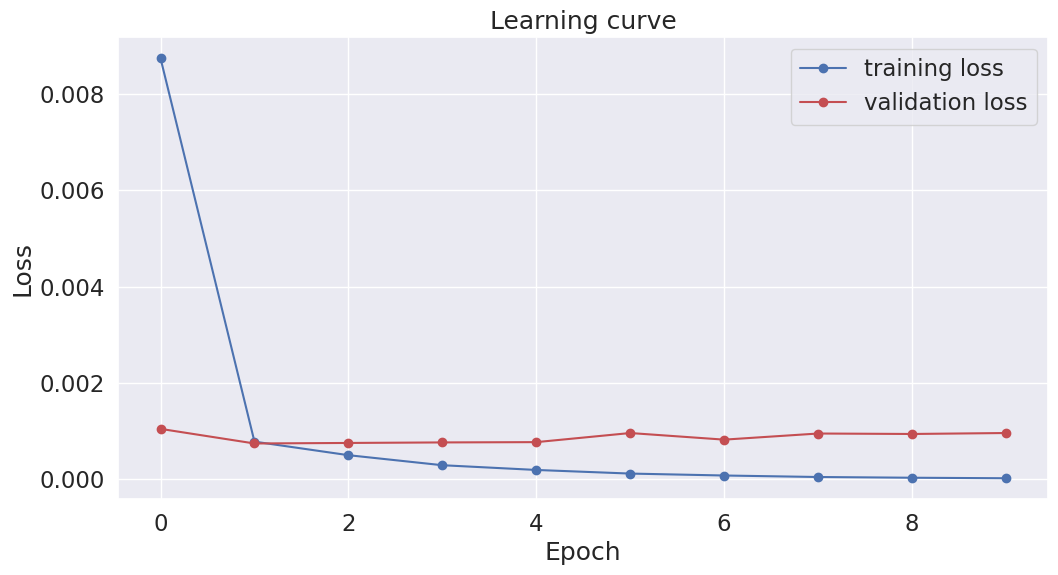

time: 373 ms (started: 2023-04-22 09:05:30 +00:00)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Desconectamos la sesión de Google Colab
Con el fin de dejar los modelos entrenando por la noche y no consumir recursos, desconectamos la sesión una vez han sido guardados. Lo comentamos, dado que la desconexión la vamos a hacer al final, una vez se han hecho las predicciones

In [ ]:
##https://stackoverflow.com/questions/68521308/how-can-i-disconnect-the-google-colab-runtime-from-within-a-cell
#from google.colab import runtime
#runtime.unassign()

time: 195 µs (started: 2023-04-22 09:05:31 +00:00)


## Obtenemos las predicciones del conjunto de test set

Desde la propia tarea se proporciona un script para la evaluación de los modelos en el conjunto de test.

Este script está alojado en https://github.com/TeMU-BSC/meddoprof-evaluation-library.

Vamos a hacer la predicción a nivel de sentencia por lo que una vez tengamos las predicciones debemos agrupar tanto los tokens como las etiquetas, para tener un archivo por nota clínica.

Además, tenemos que transformar el formato IOB en .ann, para ello podemos hacer uso del script:

https://github.com/Franck-Dernoncourt/NeuroNER/blob/master/neuroner/conll_to_brat.py

También, debemos tener en cuenta que por la distinta forma de tokenizar de BERT y la de NeuroNER (spaCy), puede haber discrepancias en los archivos.

Por último, debemos tener en cuenta que al hacer las predicciones, debemos truncar las sentencias mayores a 512



### Cargamos el modelo

Siempre y cuando no hagamos una ejecución desde cero

En primer lugar, cargamos los modelos, previamente guardados

1. https://stackoverflow.com/questions/58417374/how-to-load-the-saved-tokenizer-from-pretrained-model
2. https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.from_pretrained


Debemos tener en cuenta el orden de las etiquetas de `tag_value`, dado que al cargar el modelo puede que el orden del diccionario no sea el mismo

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
# Cargamos el modelo
model = AutoModelForTokenClassification.from_pretrained("/content/drive/MyDrive/Modelos TFM/" + ruta).cuda()
# Cargamos el tokenizador
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Modelos TFM/" + ruta)

# Volvemos a especificar el orden de las etiquetas
if (tarea_param == "ner"):
  # Tarea 1
  tag_values = ['B-PROFESION', 'B-SITUACION_LABORAL', 'I-SITUACION_LABORAL', 'I-ACTIVIDAD', 'I-PROFESION', 'O', 'B-ACTIVIDAD', 'PAD']
  tag2idx = {'B-PROFESION': 0, 'B-SITUACION_LABORAL': 1, 'I-SITUACION_LABORAL': 2, 'I-ACTIVIDAD': 3, 'I-PROFESION': 4, 'O': 5, 'B-ACTIVIDAD': 6, 'PAD': 7}
  idx2tag = {0: 'B-PROFESION', 1: 'B-SITUACION_LABORAL', 2: 'I-SITUACION_LABORAL', 3: 'I-ACTIVIDAD', 4: 'I-PROFESION', 5: 'O', 6: 'B-ACTIVIDAD', 7: 'PAD'}
if (tarea_param == "class"):
  # Tarea 2
  tag_values = ['B-FAMILIAR', 'I-PACIENTE', 'I-OTROS', 'B-SANITARIO', 'B-PACIENTE', 'I-FAMILIAR', 'O', 'B-OTROS', 'I-SANITARIO', 'PAD']
  tag2idx = {'B-FAMILIAR': 0, 'I-PACIENTE': 1, 'I-OTROS': 2, 'B-SANITARIO': 3, 'B-PACIENTE': 4, 'I-FAMILIAR': 5, 'O': 6, 'B-OTROS': 7, 'I-SANITARIO': 8, 'PAD': 9}
  idx2tag = {0: 'B-FAMILIAR', 1: 'I-PACIENTE', 2: 'I-OTROS', 3: 'B-SANITARIO', 4: 'B-PACIENTE', 5: 'I-FAMILIAR', 6: 'O', 7: 'B-OTROS', 8: 'I-SANITARIO', 9: 'PAD'}

time: 235 ms (started: 2023-04-22 09:05:31 +00:00)




---



### Inferencia y postprocesado

Creamos una función que devuelve tanto los tokens como las etiquetas predichas por el modelo.

Importante añadir `truncation = True` dado que si al hacer inferencia hay una frase superior a 512 dará error

También debemos tener en cuenta que los tokens aquí obtenidos son distintos que los obtenidos con NeuroNER puesto que el tokenizador es distinto (spaCy vs BERT)

In [ ]:
def funcion_test(frase_test):
  tokenized_sentence = tokenizer.encode(frase_test.split(), truncation=True, max_length=MAX_LEN, is_split_into_words=True)
  tokenized_words_ids = tokenizer(frase_test.split(), truncation=True, max_length=MAX_LEN, is_split_into_words=True)
  # Posición de las palabras
  word_ids = tokenized_words_ids.word_ids
  input_ids = torch.tensor([tokenized_sentence]).cuda()
  
  # Inferencia
  with torch.no_grad():
    output = model(input_ids)
  label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)
  tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])

  df = pd.DataFrame(zip(tokens, label_indices[0], word_ids(0)), columns=["labels", "tokens", "relation"])
  # Corregimos el tokenizado en subpalabras
  df['labels'] = df['labels'].str.replace('##', '')
  df['tokens'] = df['tokens'].map(idx2tag)
  # Eliminamos la primera fila y la última ya que contienen información relevante a las etiquetas CLS y SEP
  df = df[1:-1]
  df['relation'] = df['relation'].astype('int')
  # Creamos la columna labels_corregidos donde agrupamos los tokens que pertenecen a una misma palabra según el parámetro words_input
  # https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
  df['labels_corregidos'] = df.groupby('relation')['labels'].transform(lambda x: ''.join(x))
  # Nos quedamos únicamente con el primer valor por cada grupo (para eliminar los subtokens una vez hemos juntado)
  df = df.groupby('relation').first()
  return df['labels_corregidos'].tolist(), df['tokens'].tolist()

time: 741 µs (started: 2023-04-22 09:05:31 +00:00)


Nos quedamos con las columnas del conjunto de test necesarias

In [ ]:
test

,words,fileId,start,end,label,sentenceID,sentence,word_labels,inicio,fin
0,Un,32423911_ES,0,3,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
1,hombre,32423911_ES,4,10,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
2,de,32423911_ES,11,13,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
3,36,32423911_ES,14,16,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
4,años,32423911_ES,17,21,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
...,...,...,...,...,...,...,...,...,...,...
215526,diagnóstico,cc_reuma8,855,866,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215527,de,cc_reuma8,867,869,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215528,artritis,cc_reuma8,870,878,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215529,reumatoide,cc_reuma8,879,889,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890


time: 14.5 ms (started: 2023-04-22 09:05:31 +00:00)


In [ ]:
test_reducido = test[["fileId", "sentence", "sentenceID", "word_labels", "inicio", "fin"]].drop_duplicates()
test_reducido

,fileId,sentence,sentenceID,word_labels,inicio,fin
0,32423911_ES,Un hombre de 36 años llegó al servicio de urge...,1,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
30,32423911_ES,Refirió empeoramiento significativo de la disn...,2,O O O O O O O O O O O O O O O O O O,165 173 187 201 204 207 214 217 221 223 229 23...,172 186 200 203 206 213 216 220 222 228 236 23...
48,32423911_ES,Sus antecedentes médicos solo eran relevantes ...,3,O O O O O O O O O O O O O O O O O,276 280 293 301 306 311 322 326 331 340 342 34...,279 292 300 305 310 321 325 330 339 341 345 34...
65,32423911_ES,No tenía antecedentes de traumatismos reciente...,4,O O O O O O O O O O O,380 383 389 402 405 418 428 431 434 445 452,382 388 401 404 417 427 430 433 444 452 453
76,32423911_ES,El paciente trabajaba como mensajero y había a...,5,O O O O B-PACIENTE O O O B-PACIENTE I-PACIENTE...,454 457 466 476 481 491 493 499 505 511 521 52...,456 465 475 480 490 492 498 504 510 520 527 53...
...,...,...,...,...,...,...
215452,cc_reuma8,Como hallazgo incidental se encontró síndrome ...,10435,O O O O O O O O O O O O,385 390 399 410 413 422 431 434 438 440 445 449,389 398 409 412 421 430 433 437 439 444 449 450
215464,cc_reuma8,El interrogatorio dirigido permitió dilucidar ...,10436,O O O O O O O O O O O O O O O O O,451 454 469 478 487 497 501 505 514 520 527 53...,453 468 477 486 496 500 504 513 519 526 529 53...
215481,cc_reuma8,Ante la sospecha clínica se decidió determinar...,10437,O O O O O O O O O O O O O O O O O,559 564 567 576 584 587 595 606 618 627 629 63...,563 566 575 583 586 594 605 617 626 628 635 64...
215498,cc_reuma8,"Asimismo , las concentraciones solicitadas de ...",10438,O O O O O O O O O O O O O O O O O O O O O O,674 682 684 688 704 716 719 723 725 729 732 74...,682 683 687 703 715 718 722 724 728 731 743 74...


time: 236 ms (started: 2023-04-22 09:05:31 +00:00)


Vemos el texto tokenizado

In [ ]:
test_reducido["tokenizado"] = test_reducido["sentence"].apply(lambda x: len(tokenizer.tokenize(x)))
test_reducido.sort_values(by=['tokenizado'], ascending=False)[0:10]

Token indices sequence length is longer than the specified maximum sequence length for this model (901 > 512). Running this sequence through the model will result in indexing errors


,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado
85941,caso_clinico_psiquiatria490,EXPLORACIONES COMPLEMENTARIAS En última analít...,4205,O O O O O O O O O O O O O O O O O O O O O O O ...,2752 2766 2782 2785 2792 2802 2812 2815 2821 2...,2765 2781 2784 2791 2801 2811 2814 2820 2824 2...,901
155071,casos_clinicos_profesiones182,EXAMENES AUXILIARES : - ANALÍTICAS : - Hemogra...,7593,O O O O O O O O O O O O O O O O O O O O O O O ...,3332 3341 3351 3353 3355 3365 3367 3369 3378 3...,3340 3351 3352 3354 3365 3366 3368 3378 3379 3...,673
132855,casos_clinicos_profesiones128,• Exámenes complementarios -Biometría hemática...,6522,O O O O O O O O O O O O O O O O O O O O O O O ...,693 695 704 720 731 739 741 748 759 762 776 78...,694 703 719 730 739 740 747 758 761 775 784 78...,405
115920,casos_clinicos_profesiones102,Se le practicaron tres necrectomías : la prime...,5693,O O O O O O O O O O O O O O O O O O O O O O O ...,3214 3217 3220 3232 3237 3249 3251 3254 3262 3...,3216 3219 3231 3236 3249 3250 3253 3261 3263 3...,385
115409,casos_clinicos_profesiones102,Al examen físico se constató un adecuado estad...,5685,O O O O O O O O O O O O O O O O O O O O O O O ...,330 333 340 347 350 359 362 371 378 381 392 39...,332 339 346 349 358 361 370 377 380 391 393 40...,312
214605,cc_reuma58,En la exploración general dificultad para la p...,10398,O O O O O O O O O O O O O O O O O O O O O O O ...,441 444 447 459 467 478 483 486 496 499 506 51...,443 446 458 466 477 482 485 495 498 505 516 51...,310
214815,cc_reuma58,Engrosamiento mural simétrico en carótida intr...,10399,O O O O O O O O O O O O O O O O O O O O O O O ...,1850 1864 1870 1880 1883 1892 1907 1918 1933 1...,1863 1869 1879 1882 1891 1906 1916 1932 1942 1...,297
123180,casos_clinicos_profesiones116,"En este caso , se aplicó un tratamiento multic...",6015,O O O O O O O O O O O O O O O O O O O O O O O ...,8331 8334 8339 8343 8345 8348 8355 8358 8370 8...,8333 8338 8343 8344 8347 8354 8357 8369 8385 8...,293
116542,casos_clinicos_profesiones103,Se realizo la limpieza y curación de las quema...,5705,O O O O O O O O O O O O O O O O O O O O O O O ...,1338 1341 1349 1352 1361 1363 1372 1375 1379 1...,1340 1348 1351 1360 1362 1371 1374 1378 1389 1...,245
29353,caso_clinico_medicina_interna22,"· Bioquímica : Glucosa 138 mg / dl , Urea 70 m...",1421,O O O O O O O O O O O O O O O O O O O O O O O ...,2122 2124 2134 2136 2144 2148 2150 2151 2153 2...,2123 2134 2135 2143 2147 2150 2151 2153 2154 2...,219


time: 1.21 s (started: 2023-04-22 09:05:31 +00:00)


Hacemos las predicciones sobre las frases originales, con la funcion `funcion_test`.

In [ ]:
# El corchete después de la funcion_test(x) nos permite seleccionar cual de los dos objetos que se devuelven quedarnos (la funcion tiene un return con dos valorese).
test_reducido["sentence_computed"] = test_reducido["sentence"].apply(lambda x: funcion_test(x)[0])
test_reducido["word_labels_computed"] = test_reducido["sentence"].apply(lambda x: funcion_test(x)[1])
test_reducido

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed
0,32423911_ES,Un hombre de 36 años llegó al servicio de urge...,1,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...,37,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
30,32423911_ES,Refirió empeoramiento significativo de la disn...,2,O O O O O O O O O O O O O O O O O O,165 173 187 201 204 207 214 217 221 223 229 23...,172 186 200 203 206 213 216 220 222 228 236 23...,22,"[▁refirió, ▁empeoramiento, ▁significativo, ▁de...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
48,32423911_ES,Sus antecedentes médicos solo eran relevantes ...,3,O O O O O O O O O O O O O O O O O,276 280 293 301 306 311 322 326 331 340 342 34...,279 292 300 305 310 321 325 330 339 341 345 34...,23,"[▁sus, ▁antecedentes, ▁médicos, ▁solo, ▁eran, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
65,32423911_ES,No tenía antecedentes de traumatismos reciente...,4,O O O O O O O O O O O,380 383 389 402 405 418 428 431 434 445 452,382 388 401 404 417 427 430 433 444 452 453,15,"[▁no, ▁tenía, ▁antecedentes, ▁de, ▁traumatismo...","[O, O, O, O, O, O, O, O, O, O, O]"
76,32423911_ES,El paciente trabajaba como mensajero y había a...,5,O O O O B-PACIENTE O O O B-PACIENTE I-PACIENTE...,454 457 466 476 481 491 493 499 505 511 521 52...,456 465 475 480 490 492 498 504 510 520 527 53...,15,"[▁el, ▁paciente, ▁trabajaba, ▁como, ▁mensajero...","[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ..."
...,...,...,...,...,...,...,...,...,...
215452,cc_reuma8,Como hallazgo incidental se encontró síndrome ...,10435,O O O O O O O O O O O O,385 390 399 410 413 422 431 434 438 440 445 449,389 398 409 412 421 430 433 437 439 444 449 450,13,"[▁como, ▁hallazgo, ▁incidental, ▁se, ▁encontró...","[O, O, O, O, O, O, O, O, O, O, O, O]"
215464,cc_reuma8,El interrogatorio dirigido permitió dilucidar ...,10436,O O O O O O O O O O O O O O O O O,451 454 469 478 487 497 501 505 514 520 527 53...,453 468 477 486 496 500 504 513 519 526 529 53...,20,"[▁el, ▁interrogatorio, ▁dirigido, ▁permitió, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
215481,cc_reuma8,Ante la sospecha clínica se decidió determinar...,10437,O O O O O O O O O O O O O O O O O,559 564 567 576 584 587 595 606 618 627 629 63...,563 566 575 583 586 594 605 617 626 628 635 64...,22,"[▁ante, ▁la, ▁sospecha, ▁clínica, ▁se, ▁decidi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
215498,cc_reuma8,"Asimismo , las concentraciones solicitadas de ...",10438,O O O O O O O O O O O O O O O O O O O O O O,674 682 684 688 704 716 719 723 725 729 732 74...,682 683 687 703 715 718 722 724 728 731 743 74...,25,"[▁asimismo, ▁,, ▁las, ▁concentraciones, ▁solic...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


time: 5min 31s (started: 2023-04-22 09:05:32 +00:00)


In [ ]:
# Hacemos comprobaciones del distinto número de tokens en función de la tokenización (NeuroNER) o BERT
test_reducido["sentence"] = test_reducido["sentence"].apply(lambda x: x.split(' ')) # Transformamos en lista
test_reducido["word_labels"] = test_reducido["word_labels"].apply(lambda x: x.split(' ')) # Transformamos en lista
test_reducido["inicio"] = test_reducido["inicio"].apply(lambda x: x.split(' ')) # Transformamos en lista
test_reducido["fin"] = test_reducido["fin"].apply(lambda x: x.split(' ')) # Transformamos en lista
# Contamos número de tokens y de labels
test_reducido['len_sentence'] = test_reducido.apply(lambda row: len(row['sentence']), axis=1) # Contamos número de tokens que hay en las etiquetas originales
test_reducido['len_sentence_computed'] = test_reducido.apply(lambda row: len(row['sentence_computed']), axis=1) # Contamos número de tokens que hay en las etiquetas predichas
test_reducido['len_word_labels'] = test_reducido.apply(lambda row: len(row['word_labels']), axis=1) # Contamos número de tokens que hay en las etiquetas originales
test_reducido['len_word_labels_computed'] = test_reducido.apply(lambda row: len(row['word_labels_computed']), axis=1) # Contamos número de tokens que hay en las etiquetas predichas
test_reducido['len_inicio'] = test_reducido.apply(lambda row: len(row['inicio']), axis=1) # Contamos número de tokens que hay en las etiquetas originales
test_reducido['len_fin'] = test_reducido.apply(lambda row: len(row['fin']), axis=1) # Contamos número de tokens que hay en las etiquetas originales

test_reducido

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin
0,32423911_ES,"[Un, hombre, de, 36, años, llegó, al, servicio...",1,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",37,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",30,30,30,30,30,30
30,32423911_ES,"[Refirió, empeoramiento, significativo, de, la...",2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[165, 173, 187, 201, 204, 207, 214, 217, 221, ...","[172, 186, 200, 203, 206, 213, 216, 220, 222, ...",22,"[▁refirió, ▁empeoramiento, ▁significativo, ▁de...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",18,18,18,18,18,18
48,32423911_ES,"[Sus, antecedentes, médicos, solo, eran, relev...",3,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[276, 280, 293, 301, 306, 311, 322, 326, 331, ...","[279, 292, 300, 305, 310, 321, 325, 330, 339, ...",23,"[▁sus, ▁antecedentes, ▁médicos, ▁solo, ▁eran, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
65,32423911_ES,"[No, tenía, antecedentes, de, traumatismos, re...",4,"[O, O, O, O, O, O, O, O, O, O, O]","[380, 383, 389, 402, 405, 418, 428, 431, 434, ...","[382, 388, 401, 404, 417, 427, 430, 433, 444, ...",15,"[▁no, ▁tenía, ▁antecedentes, ▁de, ▁traumatismo...","[O, O, O, O, O, O, O, O, O, O, O]",11,11,11,11,11,11
76,32423911_ES,"[El, paciente, trabajaba, como, mensajero, y, ...",5,"[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...","[454, 457, 466, 476, 481, 491, 493, 499, 505, ...","[456, 465, 475, 480, 490, 492, 498, 504, 510, ...",15,"[▁el, ▁paciente, ▁trabajaba, ▁como, ▁mensajero...","[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...",15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215452,cc_reuma8,"[Como, hallazgo, incidental, se, encontró, sín...",10435,"[O, O, O, O, O, O, O, O, O, O, O, O]","[385, 390, 399, 410, 413, 422, 431, 434, 438, ...","[389, 398, 409, 412, 421, 430, 433, 437, 439, ...",13,"[▁como, ▁hallazgo, ▁incidental, ▁se, ▁encontró...","[O, O, O, O, O, O, O, O, O, O, O, O]",12,12,12,12,12,12
215464,cc_reuma8,"[El, interrogatorio, dirigido, permitió, diluc...",10436,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[451, 454, 469, 478, 487, 497, 501, 505, 514, ...","[453, 468, 477, 486, 496, 500, 504, 513, 519, ...",20,"[▁el, ▁interrogatorio, ▁dirigido, ▁permitió, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
215481,cc_reuma8,"[Ante, la, sospecha, clínica, se, decidió, det...",10437,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[559, 564, 567, 576, 584, 587, 595, 606, 618, ...","[563, 566, 575, 583, 586, 594, 605, 617, 626, ...",22,"[▁ante, ▁la, ▁sospecha, ▁clínica, ▁se, ▁decidi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
215498,cc_reuma8,"[Asimismo, ,, las, concentraciones, solicitada...",10438,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[674, 682, 684, 688, 704, 716, 719, 723, 725, ...","[682, 683, 687, 703, 715, 718, 722, 724, 728, ...",25,"[▁asimismo, ▁,, ▁las, ▁concentraciones, ▁solic...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",22,22,22,22,22,22


time: 1.2 s (started: 2023-04-22 09:11:04 +00:00)


In [ ]:
# Comprobamos que haya mismo número de tokens que de labels en el gold standard
print(test_reducido.apply(lambda row: len(row['sentence']) == len(row['word_labels']), axis=1).all())

# Comprobamos que haya mismo número de tokens que de labels en las etiquetas predichas
print(test_reducido.apply(lambda row: len(row['sentence_computed']) == len(row['word_labels_computed']), axis=1).all())

True
True
time: 145 ms (started: 2023-04-22 09:11:05 +00:00)


In [ ]:
# Mostramos aquellos casos en los que haya discrepancias en la frase original y la frase predicha. Esto ocurre cuando al hacer el tokenizado BERT pone un token [UNK]
# También ocurre por el formato de lectura de los archivos \ufeff 
prueba = test_reducido[test_reducido['sentence'] != test_reducido['sentence_computed']]
#prueba.loc[prueba.index[1], ['sentence', 'sentence_computed']].to_csv("prueba.txt")
prueba

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin
0,32423911_ES,"[Un, hombre, de, 36, años, llegó, al, servicio...",1,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",37,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",30,30,30,30,30,30
30,32423911_ES,"[Refirió, empeoramiento, significativo, de, la...",2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[165, 173, 187, 201, 204, 207, 214, 217, 221, ...","[172, 186, 200, 203, 206, 213, 216, 220, 222, ...",22,"[▁refirió, ▁empeoramiento, ▁significativo, ▁de...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",18,18,18,18,18,18
48,32423911_ES,"[Sus, antecedentes, médicos, solo, eran, relev...",3,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[276, 280, 293, 301, 306, 311, 322, 326, 331, ...","[279, 292, 300, 305, 310, 321, 325, 330, 339, ...",23,"[▁sus, ▁antecedentes, ▁médicos, ▁solo, ▁eran, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
65,32423911_ES,"[No, tenía, antecedentes, de, traumatismos, re...",4,"[O, O, O, O, O, O, O, O, O, O, O]","[380, 383, 389, 402, 405, 418, 428, 431, 434, ...","[382, 388, 401, 404, 417, 427, 430, 433, 444, ...",15,"[▁no, ▁tenía, ▁antecedentes, ▁de, ▁traumatismo...","[O, O, O, O, O, O, O, O, O, O, O]",11,11,11,11,11,11
76,32423911_ES,"[El, paciente, trabajaba, como, mensajero, y, ...",5,"[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...","[454, 457, 466, 476, 481, 491, 493, 499, 505, ...","[456, 465, 475, 480, 490, 492, 498, 504, 510, ...",15,"[▁el, ▁paciente, ▁trabajaba, ▁como, ▁mensajero...","[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...",15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215452,cc_reuma8,"[Como, hallazgo, incidental, se, encontró, sín...",10435,"[O, O, O, O, O, O, O, O, O, O, O, O]","[385, 390, 399, 410, 413, 422, 431, 434, 438, ...","[389, 398, 409, 412, 421, 430, 433, 437, 439, ...",13,"[▁como, ▁hallazgo, ▁incidental, ▁se, ▁encontró...","[O, O, O, O, O, O, O, O, O, O, O, O]",12,12,12,12,12,12
215464,cc_reuma8,"[El, interrogatorio, dirigido, permitió, diluc...",10436,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[451, 454, 469, 478, 487, 497, 501, 505, 514, ...","[453, 468, 477, 486, 496, 500, 504, 513, 519, ...",20,"[▁el, ▁interrogatorio, ▁dirigido, ▁permitió, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
215481,cc_reuma8,"[Ante, la, sospecha, clínica, se, decidió, det...",10437,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[559, 564, 567, 576, 584, 587, 595, 606, 618, ...","[563, 566, 575, 583, 586, 594, 605, 617, 626, ...",22,"[▁ante, ▁la, ▁sospecha, ▁clínica, ▁se, ▁decidi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17
215498,cc_reuma8,"[Asimismo, ,, las, concentraciones, solicitada...",10438,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[674, 682, 684, 688, 704, 716, 719, 723, 725, ...","[682, 683, 687, 703, 715, 718, 722, 724, 728, ...",25,"[▁asimismo, ▁,, ▁las, ▁concentraciones, ▁solic...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",22,22,22,22,22,22


time: 34.4 ms (started: 2023-04-22 09:11:05 +00:00)


In [ ]:
# Comprobamos las discrepancias en el número de etiquetas originales y en el número de etiquetas calculadas
prueba = test_reducido[test_reducido['len_word_labels'] != test_reducido['len_word_labels_computed']]
#prueba.loc[prueba.index[1], ['sentence', 'sentence_computed']].to_csv("prueba.txt")
prueba

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin
85941,caso_clinico_psiquiatria490,"[EXPLORACIONES, COMPLEMENTARIAS, En, última, a...",4205,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[2752, 2766, 2782, 2785, 2792, 2802, 2812, 281...","[2765, 2781, 2784, 2791, 2801, 2811, 2814, 282...",901,"[▁exploraciones, ▁complementarias, ▁en, ▁últim...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",583,326,583,326,583,583
155071,casos_clinicos_profesiones182,"[EXAMENES, AUXILIARES, :, -, ANALÍTICAS, :, -,...",7593,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[3332, 3341, 3351, 3353, 3355, 3365, 3367, 336...","[3340, 3351, 3352, 3354, 3365, 3366, 3368, 337...",673,"[▁examenes, ▁auxiliares, ▁:, ▁-, ▁analíticas, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",444,344,444,344,444,444


time: 17.7 ms (started: 2023-04-22 09:11:05 +00:00)


In [ ]:
# Comprobamos las discrepancias en el número de tokens originales y en el número de tokens calculadas
prueba = test_reducido[test_reducido['len_sentence'] != test_reducido['len_sentence_computed']]
#prueba.loc[prueba.index[2], ['sentence', 'sentence_computed']].to_csv("prueba.txt")
prueba

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin
85941,caso_clinico_psiquiatria490,"[EXPLORACIONES, COMPLEMENTARIAS, En, última, a...",4205,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[2752, 2766, 2782, 2785, 2792, 2802, 2812, 281...","[2765, 2781, 2784, 2791, 2801, 2811, 2814, 282...",901,"[▁exploraciones, ▁complementarias, ▁en, ▁últim...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",583,326,583,326,583,583
155071,casos_clinicos_profesiones182,"[EXAMENES, AUXILIARES, :, -, ANALÍTICAS, :, -,...",7593,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[3332, 3341, 3351, 3353, 3355, 3365, 3367, 336...","[3340, 3351, 3352, 3354, 3365, 3366, 3368, 337...",673,"[▁examenes, ▁auxiliares, ▁:, ▁-, ▁analíticas, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",444,344,444,344,444,444


time: 17.2 ms (started: 2023-04-22 09:11:05 +00:00)


In [ ]:
# Calculamos posibles discrepancias de todas las variables a la vez
test_reducido['comparison'] = test_reducido.apply(lambda row: 1  if row['len_sentence_computed'] == row['len_word_labels_computed'] and row['len_word_labels_computed'] == row['len_inicio'] and row['len_inicio'] == row['len_fin']  else 0, axis=1)
test_reducido[test_reducido["comparison"] == 0]["fileId"].drop_duplicates()

85941       caso_clinico_psiquiatria490
155071    casos_clinicos_profesiones182
Name: fileId, dtype: object

time: 174 ms (started: 2023-04-22 09:11:05 +00:00)


Las discrepancias están en:
1. Surge un caracter <0xad>
2. Texto con más de 510 tokens
https://stackoverflow.com/questions/51976328/best-way-to-remove-xad-in-python

In [ ]:
# Mostramos aquellos casos en los que haya discrepancias en el número de tokens en el gold standard y el número de tokens predichos
test_reducido[test_reducido['len_word_labels'] != test_reducido['len_word_labels_computed']]

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin,comparison
85941,caso_clinico_psiquiatria490,"[EXPLORACIONES, COMPLEMENTARIAS, En, última, a...",4205,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[2752, 2766, 2782, 2785, 2792, 2802, 2812, 281...","[2765, 2781, 2784, 2791, 2801, 2811, 2814, 282...",901,"[▁exploraciones, ▁complementarias, ▁en, ▁últim...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",583,326,583,326,583,583,0
155071,casos_clinicos_profesiones182,"[EXAMENES, AUXILIARES, :, -, ANALÍTICAS, :, -,...",7593,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[3332, 3341, 3351, 3353, 3355, 3365, 3367, 336...","[3340, 3351, 3352, 3354, 3365, 3366, 3368, 337...",673,"[▁examenes, ▁auxiliares, ▁:, ▁-, ▁analíticas, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",444,344,444,344,444,444,0


time: 17.8 ms (started: 2023-04-22 09:11:06 +00:00)


Las discrepancias vistas, total cuatro, las solucionamos de la siguiente forma:

1. En `sentence_computed` ponemos `sentence`(de esta forma, los textos que se han truncado se recuperan y además, los errores de codificación los corregimos)
2. Completamos `word_labels_computed` asumiendo que todas las etiquetas son "O" (es decir, la clase mayoritaria)

In [ ]:
# 1 Ponemos sentence en sentence_computed
def change_value(row):
    if row['comparison'] == 0:
        return row['sentence']
    else:
      return row['sentence_computed']

# Apply the function to each row using the apply method
test_reducido['sentence_computed'] = test_reducido.apply(change_value, axis=1)

# 1 Ponemos sentence en sentence_computed
def change_value2(row):
    if row['comparison'] == 0:
        return row['word_labels_computed']+["O"]*(row["len_sentence"]-row["len_sentence_computed"])
    else:
      return row['word_labels_computed']

test_reducido['word_labels_computed'] = test_reducido.apply(change_value2, axis=1)

time: 149 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
test_reducido

,fileId,sentence,sentenceID,word_labels,inicio,fin,tokenizado,sentence_computed,word_labels_computed,len_sentence,len_sentence_computed,len_word_labels,len_word_labels_computed,len_inicio,len_fin,comparison
0,32423911_ES,"[Un, hombre, de, 36, años, llegó, al, servicio...",1,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",37,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",30,30,30,30,30,30,1
30,32423911_ES,"[Refirió, empeoramiento, significativo, de, la...",2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[165, 173, 187, 201, 204, 207, 214, 217, 221, ...","[172, 186, 200, 203, 206, 213, 216, 220, 222, ...",22,"[▁refirió, ▁empeoramiento, ▁significativo, ▁de...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",18,18,18,18,18,18,1
48,32423911_ES,"[Sus, antecedentes, médicos, solo, eran, relev...",3,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[276, 280, 293, 301, 306, 311, 322, 326, 331, ...","[279, 292, 300, 305, 310, 321, 325, 330, 339, ...",23,"[▁sus, ▁antecedentes, ▁médicos, ▁solo, ▁eran, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17,1
65,32423911_ES,"[No, tenía, antecedentes, de, traumatismos, re...",4,"[O, O, O, O, O, O, O, O, O, O, O]","[380, 383, 389, 402, 405, 418, 428, 431, 434, ...","[382, 388, 401, 404, 417, 427, 430, 433, 444, ...",15,"[▁no, ▁tenía, ▁antecedentes, ▁de, ▁traumatismo...","[O, O, O, O, O, O, O, O, O, O, O]",11,11,11,11,11,11,1
76,32423911_ES,"[El, paciente, trabajaba, como, mensajero, y, ...",5,"[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...","[454, 457, 466, 476, 481, 491, 493, 499, 505, ...","[456, 465, 475, 480, 490, 492, 498, 504, 510, ...",15,"[▁el, ▁paciente, ▁trabajaba, ▁como, ▁mensajero...","[O, O, O, O, B-PACIENTE, O, O, O, B-PACIENTE, ...",15,15,15,15,15,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215452,cc_reuma8,"[Como, hallazgo, incidental, se, encontró, sín...",10435,"[O, O, O, O, O, O, O, O, O, O, O, O]","[385, 390, 399, 410, 413, 422, 431, 434, 438, ...","[389, 398, 409, 412, 421, 430, 433, 437, 439, ...",13,"[▁como, ▁hallazgo, ▁incidental, ▁se, ▁encontró...","[O, O, O, O, O, O, O, O, O, O, O, O]",12,12,12,12,12,12,1
215464,cc_reuma8,"[El, interrogatorio, dirigido, permitió, diluc...",10436,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[451, 454, 469, 478, 487, 497, 501, 505, 514, ...","[453, 468, 477, 486, 496, 500, 504, 513, 519, ...",20,"[▁el, ▁interrogatorio, ▁dirigido, ▁permitió, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17,1
215481,cc_reuma8,"[Ante, la, sospecha, clínica, se, decidió, det...",10437,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[559, 564, 567, 576, 584, 587, 595, 606, 618, ...","[563, 566, 575, 583, 586, 594, 605, 617, 626, ...",22,"[▁ante, ▁la, ▁sospecha, ▁clínica, ▁se, ▁decidi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",17,17,17,17,17,17,1
215498,cc_reuma8,"[Asimismo, ,, las, concentraciones, solicitada...",10438,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[674, 682, 684, 688, 704, 716, 719, 723, 725, ...","[682, 683, 687, 703, 715, 718, 722, 724, 728, ...",25,"[▁asimismo, ▁,, ▁las, ▁concentraciones, ▁solic...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",22,22,22,22,22,22,1


time: 28.5 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
# Vemos el conjunto de test
test

,words,fileId,start,end,label,sentenceID,sentence,word_labels,inicio,fin
0,Un,32423911_ES,0,3,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
1,hombre,32423911_ES,4,10,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
2,de,32423911_ES,11,13,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
3,36,32423911_ES,14,16,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
4,años,32423911_ES,17,21,O,1,Un hombre de 36 años llegó al servicio de urge...,O O O O O O O O O O O O O O O O O O O O O O O ...,0 4 11 14 17 22 28 31 40 43 53 57 66 76 80 91 ...,3 10 13 16 21 27 30 39 42 52 56 65 75 79 90 92...
...,...,...,...,...,...,...,...,...,...,...
215526,diagnóstico,cc_reuma8,855,866,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215527,de,cc_reuma8,867,869,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215528,artritis,cc_reuma8,870,878,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890
215529,reumatoide,cc_reuma8,879,889,O,10439,Los resultados permitieron la integración del ...,O O O O O O O O O O O,809 813 824 836 839 851 855 867 870 879 889,812 823 835 838 850 854 866 869 878 889 890


time: 12.9 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
# Concatenamos las frases
# Items calculadas
predicciones_1 =  test_reducido.groupby("fileId")["sentence_computed"].apply(lambda x: sum(x, [])).reset_index()
predicciones_2 =  test_reducido.groupby("fileId")["word_labels_computed"].apply(lambda x: sum(x, [])).reset_index()

# Items originales
predicciones_3 =  test_reducido.groupby("fileId")["sentence"].apply(lambda x: sum(x, [])).reset_index()
predicciones_4 =  test_reducido.groupby("fileId")["word_labels"].apply(lambda x: sum(x, [])).reset_index()
predicciones_5 =  test_reducido.groupby("fileId")["inicio"].apply(lambda x: sum(x, [])).reset_index()
predicciones_6 =  test_reducido.groupby("fileId")["fin"].apply(lambda x: sum(x, [])).reset_index()
predicciones_7 =  test_reducido.groupby("fileId")["tokenizado"]

# Juntamos
predicciones = pd.merge(predicciones_1, predicciones_2, on='fileId')
predicciones = pd.merge(predicciones, predicciones_3, on='fileId')
predicciones = pd.merge(predicciones, predicciones_4, on='fileId')
predicciones = pd.merge(predicciones, predicciones_5, on='fileId')
predicciones = pd.merge(predicciones, predicciones_6, on='fileId')
predicciones = pd.merge(predicciones, test_reducido[["fileId", "tokenizado"]], on='fileId')
predicciones

,fileId,sentence_computed,word_labels_computed,sentence,word_labels,inicio,fin,tokenizado
0,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",37
1,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",22
2,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",23
3,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",15
4,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",15
...,...,...,...,...,...,...,...,...
9791,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",13
9792,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",20
9793,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",22
9794,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",25


time: 241 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
predicciones = predicciones[predicciones["tokenizado"] < 510]

time: 3.05 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
# Vemos que el número de tokens y de etiquetas es el mismo
predicciones.apply(lambda row: len(row['sentence_computed']) == len(row['word_labels_computed']), axis=1).all()

True

time: 72.8 ms (started: 2023-04-22 09:11:06 +00:00)


In [ ]:
predicciones

,fileId,sentence_computed,word_labels_computed,sentence,word_labels,inicio,fin,tokenizado
0,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",37
1,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",22
2,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",23
3,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",15
4,32423911_ES,"[▁un, ▁hombre, ▁de, ▁36, ▁años, ▁llegó, ▁al, ▁...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Un, hombre, de, 36, años, llegó, al, servicio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 4, 11, 14, 17, 22, 28, 31, 40, 43, 53, 57,...","[3, 10, 13, 16, 21, 27, 30, 39, 42, 52, 56, 65...",15
...,...,...,...,...,...,...,...,...
9791,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",13
9792,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",20
9793,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",22
9794,cc_reuma8,"[▁se, ▁trata, ▁de, ▁un, ▁hombre, ▁de, ▁55, ▁añ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[Se, trata, de, un, hombre, de, 55, años, de, ...","[O, O, O, O, O, O, O, O, O, O, O, B-PACIENTE, ...","[0, 3, 9, 12, 15, 22, 25, 28, 33, 36, 40, 42, ...","[2, 8, 11, 14, 21, 24, 27, 32, 35, 40, 41, 50,...",25


time: 41.7 ms (started: 2023-04-22 09:11:06 +00:00)


Dado que la etiqueta PAD puede aparecer en la predicciones, reemplazamos todas estas ocurrencias por la clase mayoritaria "O"

In [ ]:
# Define a function to replace a value in a list
def replace_value(lst, old_val, new_val):
    if old_val in lst:
        lst[lst.index(old_val)] = new_val
    return lst

# Apply the function to the desired column using .apply() method
predicciones['word_labels_computed'] = predicciones['word_labels_computed'].apply(lambda x: replace_value(x, 'PAD', 'O'))

predicciones

Guardamos las predicciones de cada nota

In [ ]:
import pathlib
pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/").mkdir(parents=True, exist_ok=True) 

# Hacemos un bucle para crear las predicciones en un archivo .txt
for i in range(0, len(predicciones)):
  
  ## Esto no funciona por varios motivos: empezamos a contar en 1 los caracteres de la nota cuando deberíamos empezar a contar en cero
  ## además, los símbolos de puntuación se cuentan de distinta forma. Por ejemplo, el start de una coma coincide con el end del token anterior. Sin embargo esto
  ## no ocurre así con los paréntesis
  #df = pd.DataFrame({'token': predicciones.iloc[i][1], 'archivo': predicciones.iloc[i][0], 'label': predicciones.iloc[i][2]})
  #df['inicio'] = df['token'].str.len()
  #df['fin'] = df['token'].str.len()+1
  #df['fin'] = df['fin'].cumsum()
  #df['inicio'] = df['fin'] - df['inicio']
  # Para que no haya problema con el cased / uncased, en vez de lo calculado predicciones.iloc[i][1] cogemos los tokens originales
  df = pd.DataFrame({'token': predicciones.iloc[i][3], 'archivo': predicciones.iloc[i][0], 'inicio': predicciones.iloc[i][5], 'fin': predicciones.iloc[i][6], 'label': predicciones.iloc[i][2]})
  df = df[["token", "archivo", "inicio", "fin", "label"]]
  #df.to_csv("/content/drive/MyDrive/Colab Notebooks/Resultados/" + predicciones.iloc[i][0] + "_prediccion.txt", sep = " ", header = False, index = False)
  df.to_csv("/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/" + "bio" + "/" + predicciones.iloc[i][0] + ".txt", sep = " ", header = False, index = False)

time: 1min 29s (started: 2023-04-22 09:11:06 +00:00)


### Transformacion a formato standoff
Copiamos el script `conll_to_brat` de NeuroNER y comentamos la línea 142 para que los archivos pasados a la función `conll_input_filepath` y `conll_output_filepath` sean los mismos

In [ ]:
!pip install pycorenlp
!pip3 install pyneuroner[cpu]

import codecs
import glob
import os
import shutil

from neuroner import utils
from neuroner import utils_nlp

def generate_reference_text_file_for_conll(conll_input_filepath, conll_output_filepath, text_folder):
    '''
    generates reference text files and adds the corresponding filename and token offsets to conll file.
    
    conll_input_filepath: path to a conll-formatted file without filename and token offsets
    text_folder: folder to write the reference text file to
    '''
    dataset_type =  utils.get_basename_without_extension(conll_input_filepath)
    conll_file = codecs.open(conll_input_filepath, 'r', 'UTF-8')   
    utils.create_folder_if_not_exists(text_folder)
    text = ''
    new_conll_string = ''
    character_index = 0
    document_count = 0
    text_base_filename = '{0}_text_{1}'.format(dataset_type, str(document_count).zfill(5))
    for line in conll_file:
        split_line = line.strip().split(' ')
        # New document
        if '-DOCSTART-' in split_line[0]:
            new_conll_string += line
            if len(text) != 0:
                with codecs.open(os.path.join(text_folder, '{0}.txt'.format(text_base_filename)), 'w', 'UTF-8') as f:
                    f.write(text)
            text = ''
            character_index = 0
            document_count += 1
            text_base_filename = '{0}_text_{1}'.format(dataset_type, str(document_count).zfill(5))
            continue            
        # New sentence
        elif len(split_line) == 0 or len(split_line[0]) == 0:
            new_conll_string += '\n'
            if text != '':
                text += '\n'
                character_index += 1
            continue
        token = split_line[0]
        start = character_index
        end = start + len(token)
        text += token + ' '
        character_index += len(token) + 1
        new_conll_string += ' '.join([token, text_base_filename, str(start), str(end)] + split_line[1:]) + '\n' 
    if len(text) != 0:
        with codecs.open(os.path.join(text_folder, '{0}.txt'.format(text_base_filename)), 'w', 'UTF-8') as f:
            f.write(text)
    conll_file.close()
    
    with codecs.open(conll_output_filepath, 'w', 'UTF-8') as f:
        f.write(new_conll_string)

def check_compatibility_between_conll_and_brat_text(conll_filepath, brat_folder):
    '''
    check if token offsets match between conll and brat .txt files. 
    conll_filepath: path to conll file
    brat_folder: folder that contains the .txt (and .ann) files that are formatted according to brat.
                                
    '''
    verbose = False
    dataset_type = utils.get_basename_without_extension(conll_filepath)
    print("Checking compatibility between CONLL and BRAT for {0} set ... ".format(dataset_type), end='')
    conll_file = codecs.open(conll_filepath, 'r', 'UTF-8')

    previous_filename = ''
    for line in conll_file:
        line = line.strip().split(' ')
        # New sentence
        if len(line) == 0 or len(line[0]) == 0 or '-DOCSTART-' in line[0]:
            continue
        
        filename = str(line[1])
        # New file
        if filename != previous_filename:
            text_filepath = os.path.join(brat_folder, '{0}.txt'.format(filename))
            with codecs.open(text_filepath, 'r', 'UTF-8') as f:
                text = f.read()
            previous_filename = filename 
            
        label = str(line[-1]).replace('_', '-') # For LOCATION-OTHER
        
        token = {}
        token['text'] = str(line[0])
        token['start'] = int(line[2])
        token['end'] = int(line[3])

        # check that the token text matches the original
        if token['text'] != text[token['start']:token['end']]:
            print("Warning: conll and brat text do not match.")
            print("\tCONLL: {0}".format(token['text']))
            print("\tBRAT : {0}".format(text[token['start']:token['end']]))
            if token['text'] != text[token['start']:token['end']].replace(' ', '-'):
                raise AssertionError("CONLL and BRAT files are incompatible.")
    
    print("Done.")

def output_entities(brat_output_folder, previous_filename, entities, text_filepath, text, overwrite=False):
    if previous_filename == '':
        return
    output_filepath = os.path.join(brat_output_folder, '{0}.ann'.format(previous_filename))
    if not overwrite:
        # Avoid overriding existing annotation
        if os.path.exists(output_filepath) and os.path.getsize(output_filepath) > 0:
            raise AssertionError("The annotation already exists at: {0}".format(output_filepath))
    # Write the entities to the annotation file
    with codecs.open(output_filepath, 'w', 'utf-8') as output_file:
        for i, entity in enumerate(entities):
            output_file.write('T{0}\t{1} {2} {3}\t{4}\n'.format(i+1, entity['label'], entity['start'], entity['end'], 
                                                           utils_nlp.replace_unicode_whitespaces_with_ascii_whitespace(text[entity['start']:entity['end']])))
    # Copy the corresponding text file
    if text_filepath != os.path.join(brat_output_folder, os.path.basename(text_filepath)):
        shutil.copy(text_filepath, brat_output_folder)

def conll_to_brat(conll_input_filepath, conll_output_filepath, brat_original_folder, brat_output_folder, overwrite=False):
    '''
    convert conll file in conll-filepath to brat annotations and output to brat_output_folder, 
    with reference to the existing text files in brat_original_folder 
    if brat_original_folder does not exist or contain any text file, then the text files are generated from conll files,
    and conll file is updated with filenames and token offsets accordingly. 
    
    conll_input_filepath: path to conll file to convert to brat annotations
    conll_output_filepath: path to output conll file with filename and offsets that are compatible with brat annotations
    brat_original_folder: folder that contains the original .txt (and .ann) files that are formatted according to brat.
                          .txt files are used to check if the token offsets match and generate the annotation from conll.                      
    brat_output_folder: folder to output the text and brat annotations 
                        .txt files are copied from brat_original_folder to brat_output_folder
    '''
    verbose = False
    dataset_type = utils.get_basename_without_extension(conll_input_filepath)
    print("Formatting {0} set from CONLL to BRAT... ".format(dataset_type), end='')
    
    # if brat_original_folder does not exist or have any text file
    if not os.path.exists(brat_original_folder) or len(glob.glob(os.path.join(brat_original_folder, '*.txt'))) == 0:
        #assert(conll_input_filepath != conll_output_filepath) ## COMENTAMOS ESTA LÍNEA
        generate_reference_text_file_for_conll(conll_input_filepath, conll_output_filepath, brat_original_folder)

    utils.create_folder_if_not_exists(brat_output_folder)
    conll_file = codecs.open(conll_output_filepath, 'r', 'UTF-8')

    previous_token_label = 'O'
    previous_filename = ''
    text_filepath = ''
    text = ''
    entity_id = 1
    entities = []
    entity = {}
    for line in conll_file:
        line = line.strip().split(' ')
        # New sentence
        if len(line) == 0 or len(line[0]) == 0 or '-DOCSTART-' in line[0]:
            # Add the last entity 
            if entity != {}:
                if verbose: print("entity: {0}".format(entity))
                entities.append(entity)
                entity_id += 1
                entity = {}
            previous_token_label = 'O'
            continue
        
        filename = str(line[1])
        # New file
        if filename != previous_filename:    
            output_entities(brat_output_folder, previous_filename, entities, text_filepath, text, overwrite=overwrite)
            text_filepath = os.path.join(brat_original_folder, '{0}.txt'.format(filename))
            with codecs.open(text_filepath, 'r', 'UTF-8') as f:
                text = f.read()
            previous_token_label = 'O'
            previous_filename = filename 
            entity_id = 1
            entities = []
            entity = {}
            
        label = str(line[-1]).replace('_', '-') # For LOCATION-OTHER
        if label == 'O':
            # Previous entity ended
            if previous_token_label != 'O':
                if verbose: print("entity: {0}".format(entity))
                entities.append(entity)
                entity_id += 1
                entity = {}
            previous_token_label = 'O'
            continue
        
        token = {}
        token['text'] = str(line[0])
        token['start'] = int(line[2])
        token['end'] = int(line[3])
        # check that the token text matches the original
        if token['text'] != text[token['start']:token['end']].replace(' ', '-'):
            print("Warning: conll and brat text do not match.")
            print("\tCONLL: {0}".format(token['text']))
            print("\tBRAT : {0}".format(text[token['start']:token['end']]))
        token['label'] = label[2:]
    
        if label[:2] == 'B-':
            if previous_token_label != 'O':
                # End the previous entity
                if verbose: print("entity: {0}".format(entity))
                entities.append(entity)
                entity_id += 1
            # Start a new entity
            entity = token
        elif label[:2] == 'I-':
            # Entity continued
            if previous_token_label == token['label']:
                # if there is no newline between the entity and the token
                if '\n' not in text[entity['end']:token['start']]:
                    # Update entity 
                    entity['text'] = entity['text'] + ' ' + token['text']
                    entity['end'] = token['end']
                else: # newline between the entity and the token
                    # End the previous entity
                    if verbose: print("entity: {0}".format(entity))
                    entities.append(entity)
                    entity_id += 1
                    # Start a new entity
                    entity = token
            elif previous_token_label != 'O':
                # TODO: count BI or II incompatibility
                # End the previous entity
                if verbose: print("entity: {0}".format(entity))
                entities.append(entity)
                entity_id += 1
                # Start new entity
                entity = token
            else: # previous_token_label == 'O'
                # TODO: count  OI incompatibility
                # Start new entity
                entity = token
        previous_token_label = token['label']
    output_entities(brat_output_folder, previous_filename, entities, text_filepath, text, overwrite=overwrite)
    conll_file.close()
    print('Done.')

def output_brat(output_filepaths, dataset_brat_folders, stats_graph_folder, overwrite=False):
    # Output brat files
    for dataset_type in ['train', 'valid', 'test', 'deploy']:
        if dataset_type not in output_filepaths.keys():
            continue
        brat_output_folder = os.path.join(stats_graph_folder, 'brat', dataset_type)
        utils.create_folder_if_not_exists(brat_output_folder)
        conll_to_brat(output_filepaths[dataset_type], output_filepaths[dataset_type], dataset_brat_folders[dataset_type], brat_output_folder, overwrite=overwrite)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyneuroner-1.0.8-py2.py3-none-any.whl (26.9 MB)
time: 11.6 s (started: 2023-04-22 09:12:36 +00:00)


Cargamos el nombre de los archivos .bio para posteriormente usar la función de NeuroNER

In [ ]:
carpeta_a_copiar = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/"
# Sacamos el nombre de todas las notas en el directorio
# list to store files
notas_carpeta_a_copiar = []

# Iterate directory
for path in os.listdir(carpeta_a_copiar):
    # check if current path is a file
    if os.path.isfile(os.path.join(carpeta_a_copiar, path)):
        notas_carpeta_a_copiar.append(path)
print(notas_carpeta_a_copiar)
print(len(notas_carpeta_a_copiar))

['32423911_ES.txt', '32605766_ES.txt', '32614251_ES.txt', 'S0004-06142009000100010-2.txt', 'S0034-98872006000200011-1.txt', 'S0034-98872012001100010-1.txt', 'S0376-78922009000100011-1.txt', 'S1130-01082015000700010-1.txt', 'S1130-52742017000100001-1.txt', 'S1132-62552015000100005-1.txt', 'S1134-80462015000200005-1.txt', 'caso_clinico_alergologia69.txt', 'caso_clinico_atencion_primaria104.txt', 'caso_clinico_atencion_primaria146.txt', 'caso_clinico_atencion_primaria175.txt', 'caso_clinico_atencion_primaria29.txt', 'caso_clinico_atencion_primaria3.txt', 'caso_clinico_atencion_primaria33.txt', 'caso_clinico_atencion_primaria92.txt', 'caso_clinico_dermatologia123.txt', 'caso_clinico_dermatologia137.txt', 'caso_clinico_dermatologia160.txt', 'caso_clinico_dermatologia197.txt', 'caso_clinico_dermatologia242.txt', 'caso_clinico_dermatologia390.txt', 'caso_clinico_dermatologia447.txt', 'caso_clinico_dermatologia456.txt', 'caso_clinico_dermatologia469.txt', 'caso_clinico_dermatologia618.txt', 'c

Creamos los archivos .ann correspondientes

In [ ]:
import pathlib
## Creamos el directorio donde alojar las notas .ann
# pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "ann/").mkdir(parents=True, exist_ok=True) 
## Creamos una lista para guardar el nombre de las notas que puedan dar fallo

fallo = []
notas_exitosas = 0
notas_fallidas = 0
if (tarea_param == "ner"):
  for i in range(0, len(notas_carpeta_a_copiar)):
    try:
      conll_to_brat(conll_input_filepath = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/" + notas_carpeta_a_copiar[i],
                    conll_output_filepath = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/" + notas_carpeta_a_copiar[i],
                    brat_original_folder = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Original/Test/ner",
                    brat_output_folder = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/ann/")
      notas_exitosas = notas_exitosas + 1
    except Exception as e:
      print("Exception Type:", e.args[0][0], "Message:", e.args[0][1])
      fallo.append(notas_carpeta_a_copiar[i])
      notas_fallidas = notas_fallidas + 1
if (tarea_param == "class"):
  for i in range(0, len(notas_carpeta_a_copiar)):
    try:
      conll_to_brat(conll_input_filepath = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/" + notas_carpeta_a_copiar[i],
                    conll_output_filepath = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/bio/" + notas_carpeta_a_copiar[i],
                    brat_original_folder = "/content/drive/MyDrive/Colab Notebooks/Corpus/MEDDOPROF/Original/Test/class",
                    brat_output_folder = "/content/drive/MyDrive/Colab Notebooks/Resultados/" + ruta + "/ann/")
      notas_exitosas = notas_exitosas + 1
    except Exception as e:
      print("Exception Type:", e.args[0][0], "Message:", e.args[0][1])
      fallo.append(notas_carpeta_a_copiar[i])
      notas_fallidas = notas_fallidas + 1
print("Tarea: ", tarea_param)
print("Fallo: ", fallo)
print("Número de notas exitosas: ", notas_exitosas)
print("Número de notas fallidas: ", notas_fallidas)

In [ ]:
## Evitar que se pare la ejecución
#i = 1
#while i >0:
#  i = i+1
#  print(i)

# Desconectamos el entorno de ejecución

In [ ]:
##https://stackoverflow.com/questions/68521308/how-can-i-disconnect-the-google-colab-runtime-from-within-a-cell
from google.colab import runtime
runtime.unassign()

# Evaluación

Para obtener las métricas de evaluación debemos hacer los siguientes pasos

1. Descargar la librería de evaluación del GitHub oficial de la competición en local: https://github.com/TeMU-BSC/meddoprof-evaluation-library

2. Alojar las notas del conjunto de test, EXCLUSIVAMENTE, que forman parte del GOLD STANDARD. En la carpeta "/meddoprof-evaluation-library-main/gs-data/ner/" o "/meddoprof-evaluation-library-main/gs-data/class/", según la tarea que estemos haciendo. Alojamos tanto la nota (.txt), como la anotación (.ann)

3. Alojar las predicciones con los mismos nombres que en gold standard (.ann) y las notas obtenidas con las predicciones (.txt), en la carpeta "/meddoprof-evaluation-library-main/toy-data/ner"

4. Lanzar el script de la siguiente forma:

`cd src`

`python main.py -g ../gs-data/ner/ -p ../toy-data/ner/ -s ner`

o

`python main.py -g ../gs-data/class/ -p ../toy-data/class/ -s class`

La estructura que debe seguir la carpeta es la mostrada en la imagen

![picture](https://drive.google.com/uc?id=17z4LL4_xjfolDRoS2uFUvqyHXSaWPxXr)

# Errores obtenidos / consideraciones especiales


1.   UserWarning: <PAD> seems not to be NE tag: https://github.com/chakki-works/seqeval/issues/89

# Referencias

Token classification guide Hugging Face

* https://huggingface.co/course/chapter7/2

Tutorial token classification (Sylvain Gugger) Entity Level Evaluation for NER Task:

* https://discuss.huggingface.co/t/help-model-evaluation-for-ner-yields-different-results-sklearn-vs-metric-compute/10528

(https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/token_classification.ipynb#scrollTo=545PP3o8IrJV)

Entity Level Evaluation for NER Task:

* https://towardsdatascience.com/entity-level-evaluation-for-ner-task-c21fb3a8edf

Fine-tuning BERT for named-entity recognition:

* https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/BERT/Custom_Named_Entity_Recognition_with_BERT_only_first_wordpiece.ipynb

* https://github.com/NielsRogge/Transformers-Tutorials/tree/master/BERT

Medical-NER: A clinical trials corpus annotated with UMLS entities to enhance the access to Evidence-Based Medicine

* https://github.com/lcampillos/Medical-NER

Named Entity Recognition with BERT in PyTorch:

* https://towardsdatascience.com/named-entity-recognition-with-bert-in-pytorch-a454405e0b6a

How to fine tune bert on entity recognition?:

* https://discuss.huggingface.co/t/how-to-fine-tune-bert-on-entity-recognition/11309/5

Custom Named Entity Recognition with BERT:

* https://towardsdatascience.com/custom-named-entity-recognition-with-bert-cf1fd4510804

Named Entity Recognition with Deep Learning (BERT) — The Essential Guide:

* https://towardsdatascience.com/named-entity-recognition-with-deep-learning-bert-the-essential-guide-274c6965e2d

* https://medium.com/search?q=entity+recognition+bert

Cursos Hugging Face transformer:

* https://huggingface.co/course/chapter1/1

Explicación tokenizador WordPiece:

* https://towardsdatascience.com/how-to-build-a-wordpiece-tokenizer-for-bert-f505d97dddbb

Búsqueda de hiperparámetros con BERT:

* https://medium.com/distributed-computing-with-ray/hyperparameter-optimization-for-transformers-a-guide-c4e32c6c989b

https://huggingface.co/blog/ray-tune

BERT Fine-Tuning Tutorial with PyTorch:

* https://mccormickml.com/2019/07/22/BERT-fine-tuning/

Guía para implementar BERT:

* https://medium.com/swlh/step-by-step-bert-explanation-implementation-part-1-preprocessing-dbfa19787302

* https://medium.com/swlh/step-by-step-bert-explanation-implementation-part-2-data-formatting-loading-bb377e79e4e4

* https://phillipkimds.medium.com/step-by-step-bert-explanation-implementation-part-3-training-testing-7714f4e238c5

Guía de transformers desde el inicio:

* https://e2eml.school/transformers.html#sequence_completion

Script en el que me basado para realizar el experimento:

* https://www.depends-on-the-definition.com/named-entity-recognition-with-bert/

Métricas de evaluación (seqeval):

* https://huggingface.co/spaces/evaluate-metric/seqeval

Alineación de tokens:

* https://gist.github.com/tamuhey/af6cbb44a703423556c32798e1e1b704
* https://stackoverflow.com/questions/66232938/how-to-untokenize-bert-tokens
* https://stackoverflow.com/questions/66666525/how-to-map-token-indices-from-the-squad-data-to-tokens-from-bert-tokenizer
* https://stackoverflow.com/questions/63413414/is-there-a-way-to-get-the-location-of-the-substring-from-which-a-certain-token-h
* https://discuss.huggingface.co/t/tokenizer-splits-up-pre-split-tokens/2078/7
* https://stackoverflow.com/questions/63932600/adding-entites-to-spacy-doc-object-using-berts-offsets
* https://github.com/huggingface/transformers/issues/7019
* https://gab41.lab41.org/lessons-learned-fine-tuning-bert-for-named-entity-recognition-4022a53c0d90
* https://support.prodi.gy/t/transform-annotations-to-match-tokenization-required-for-spanbert-bert/5923/4
* https://github.com/huggingface/transformers/issues/11333

----------
A continuación recogemos los recursos y fuentes usadas para llevar a cabo el TFM:

1. Aurélien Géron. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. "O’Reilly Media, Inc.", 2022.

2. Ashish Bansal. Advanced Natural Language Processing with TensorFlow 2: Build effective real-world NLP applications using NER, RNNs, seq2seq models, Transformers, and more. Packt Publishing Ltd, 2021.

3. Sudharsan Ravichandiran. Getting Started with Google BERT: Build and train state-of-theart natural language processing models using BERT. Packt Publishing Ltd, 2021.

4. Shashank Mohan Jain. “Introduction to Transformers”. In: Introduction to Transformers for NLP: With the Hugging Face Library and Models to Solve Problems. Berkeley, CA: Apress, 2022, pp. 19–36. isbn: 978-1-4842-8844-3. doi: 10.1007/978- 1- 4842- 8844- 3_2. url: https://doi.org/10.1007/978-1-4842-8844-3_2.

5. Savas Yildirim and Meysam Asgari-Chenaghlu. Mastering Transformers: Build state-of-theart models from scratch with advanced natural language processing techniques. Packt Publishing Ltd, 2021.

6. Akshay Kulkarni, Adarsha Shivananda, and Anoosh Kulkarni. “Natural Language Processing Projects”. In: ().

7. Lewis Tunstall, Leandro von Werra, and Thomas Wolf. Natural language processing with transformers. " O’Reilly Media, Inc.", 2022.

8. Dan Jurafsky. Speech & language processing 3rd edition draft. 2021.

9. Tadej. Magajna. Natural language processing with Flair a practical guide to understanding and solving NLP problems with Flair. Packt Publishing, 2022. isbn: 9781801072311.

10. Ankur A Patel and Ajay Uppili Arasanipalai. Applied Natural Language Processing in the Enterprise. "O’Reilly Media, Inc.", 2021.

11. Eli Stevens, Luca Antiga, and Thomas Viehmann. Deep learning with PyTorch. Manning Publications, 2020.

12. Masato Hagiwara. Real-World Natural Language Processing: Practical Applications with Deep Learning. Simon and Schuster, 2021.

13. Paul Azunre. Transfer learning for natural language processing. Simon and Schuster, 2021.

14. Denis Rothman. Transformers for Natural Language Processing: Build innovative deep neural network architectures for NLP with Python, PyTorch, TensorFlow, BERT, RoBERTa, and more. Packt Publishing Ltd, 2021.
